In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model,layers
from PIL import Image
import os
import keras

#To use dataset from google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import shutil
shutil.copyfile('/content/drive/MyDrive/Abc/apple_dataset_easy.zip','./apple_dataset_easy.zip')

'./apple_dataset_easy.zip'

In [ ]:
import zipfile

zip=zipfile.ZipFile('apple_dataset_easy.zip','r')
zip.extractall()

In [ ]:
train_image_dir='apple_dataset/train/images/'
train_annotations_dir='apple_dataset/train/annotations/'

val_image_dir='apple_dataset/validation/images/'
val_annotations_dir='apple_dataset/validation/annotations/'

#To use dataset from ROBOFLOW

chess dataset

In [ ]:
# !curl -L "https://public.roboflow.com/ds/dvrTZ36CwY?key=8lLWMJPrLs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

face mask dataset

In [ ]:
!curl -L "https://app.roboflow.com/ds/JHoz0RiQus?key=L6y53uhRd1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# #augmentation

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   886  100   886    0     0   1399      0 --:--:-- --:--:-- --:--:--  1397
100 32.5M  100 32.5M    0     0  27.2M      0  0:00:01  0:00:01 --:--:-- 27.2M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.1d13317de1e4da209ba566b4acba5e0b.jpg  
 extracting: test/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.1d13317de1e4da209ba566b4acba5e0b.xml  
 extracting: test/1224331650_g_400-w_g_jpg.rf.ac3d533cf6d39adc53a89daa813ba222.jpg  
 extracting: test/1224331650_g_400-w_g_jpg.rf.ac3d533cf6d39adc53a89daa813ba222.xml  
 extracting: test/126202-untitled-design-13_jpg.rf.d9c40f748a5f8ddee298fe4b25121045.jpg  
 extracting: test/126202-untitled-design-13_jpg.rf.d9c40f748a5f8ddee298fe4b25121045.xml  
 extracting: test/1288126-10255706714j

In [ ]:
# !curl -L "https://public.roboflow.com/ds/DTD4q08DOa?key=FPI6i0iPRE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import os 

os.makedirs('train/images/')
os.makedirs('train/annotations/')

In [ ]:
import shutil
all=os.listdir('train/')
for name in all:
  #print(name[-3:None])
  if(name[-3:None]=='jpg'):
    shutil.move(os.path.join('train/',name) , 'train/images/')
  if(name[-3:None]=='xml'):
    shutil.move(os.path.join('train/',name) , 'train/annotations/')

In [ ]:
os.makedirs('valid/images/')
os.makedirs('valid/annotations/')

In [ ]:
import os 
import shutil
all=os.listdir('valid/')
for name in all:
  #print(name[-3:None])
  if(name[-3:None]=='jpg'):
    shutil.move(os.path.join('valid/',name) , 'valid/images/')
  if(name[-3:None]=='xml'):
    shutil.move(os.path.join('valid/',name) , 'valid/annotations/')

In [ ]:
train_image_dir='train/images/'
train_annotations_dir='train/annotations/'

val_image_dir='valid/images/'
val_annotations_dir='valid/annotations/'

#run this for getting annotation Files list

In [ ]:
import os
len(os.listdir(train_image_dir))

315

In [ ]:
def get_bounding_box(train_annotations_dir):
  train_annotations_path=[]
  for file in os.listdir(train_annotations_dir):
    annotations=os.path.join(train_annotations_dir,file)
    #print(annotations)
    if (annotations[-3:None]=='xml'):
      if os.path.exists(annotations):
        train_annotations_path.append(annotations)
    # print(open(annotations,'r'))
  return train_annotations_path

In [ ]:
# get_bounding_box(train_annotations_dir)

#(old work)

In [ ]:
# # importing element tree
# # under the alias of ET
# import xml.etree.ElementTree as ET

# # Passing the path of the
# # xml document to enable the
# # parsing process
# parser = ET.XMLParser(encoding="utf-8")
# tree = ET.parse('apple_dataset/train/annotations/damaged_apple (199).xml',parser=parser)

# print(tree) 
# # getting the parent tag of
# # the xml document
# #root = tree.getroot()
  
# # printing the root (parent) tag
# # of the xml document, along with
# # its memory location
# #print(root)
  
# # printing the attributes of the
# # first tag from the parent 
# #print(root[:])



# elemList = []

# for elem in root.iter():
#     elemList.append(elem.tag)
# #print(elemList)
# # printing the text contained within
# # first subtag of the 5th tag from
# # the parent
# print(root[2].text)
# print(root[:][0].text)
# root.get

In [ ]:
# pip install xmltodict

In [ ]:
# import xmltodict

# filetext=open('apple_dataset/train/annotations/damaged_apple (199).xml',encoding='UTF-8')
# xmltodict.parse(filetext)

#Intersection over Union and anchors test

In [ ]:
import sys
import keras.backend as K
def intersection_over_union(boxes_preds, boxes_labels, box_format="midpoint"):
    """
    Video explanation of this function:
    https://youtu.be/XXYG5ZWtjj0
    This function calculates intersection over union (iou) given pred boxes
    and target boxes.
    Parameters:
        boxes_preds (tensor): Predictions of Bounding Boxes (BATCH_SIZE, 4)
        boxes_labels (tensor): Correct labels of Bounding Boxes (BATCH_SIZE, 4)
        box_format (str): midpoint/corners, if boxes (x,y,w,h) or (x1,y1,x2,y2)
    Returns:
        tensor: Intersection over union for all examples
    """

    if box_format == "midpoint":
        box1_x1 = boxes_preds[..., 0:1] - boxes_preds[..., 2:3] / 2
        box1_y1 = boxes_preds[..., 1:2] - boxes_preds[..., 3:4] / 2
        box1_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3] / 2
        box1_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4] / 2
        box2_x1 = boxes_labels[..., 0:1] - boxes_labels[..., 2:3] / 2
        box2_y1 = boxes_labels[..., 1:2] - boxes_labels[..., 3:4] / 2
        box2_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3] / 2
        box2_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4] / 2
    #print("tada")
    #print(box1_x1,',',box1_y1,' ',box1_x2,',',box1_y2,'\n\n')  
    if box_format == "corners":
        box1_x1 = boxes_preds[..., 0:1]
        box1_y1 = boxes_preds[..., 1:2]
        box1_x2 = boxes_preds[..., 2:3]
        box1_y2 = boxes_preds[..., 3:4]
        box2_x1 = boxes_labels[..., 0:1]
        box2_y1 = boxes_labels[..., 1:2]
        box2_x2 = boxes_labels[..., 2:3]
        box2_y2 = boxes_labels[..., 3:4]
    #print("box1_x1",box1_x1,"box2_x1",box2_x1)
    #x1 = torch.max(box1_x1, box2_x1)
    x1 = K.max(K.concatenate([box1_x1,box2_x1]),axis=-1)
    #y1 = torch.max(box1_y1, box2_y1)
    y1 = K.max(K.concatenate([box1_y1,box2_y1]),axis=-1)
    #x2 = torch.min(box1_x2, box2_x2)
    x2 = K.min(K.concatenate([box1_x2,box2_x2]),axis=-1)
    #y2 = torch.min(box1_y2, box2_y2)
    y2 = K.min(K.concatenate([box1_y2,box2_y2]),axis=-1)
    #print("x1",x1)
    #print(x1,',',x2,' ',y1,',',y2)
    intersection = K.clip((x2 - x1),min_value=0,max_value=None) * K.clip((y2 - y1),min_value=0,max_value=None)
    #print('inter',intersection)
    #intersection=K.reshape(intersection,[intersection.shape[0],1])
    intersection=K.expand_dims(intersection,axis=-1)
    #print('interwith1',intersection)
    box1_area = abs((box1_x2 - box1_x1) * (box1_y2 - box1_y1))
    box2_area = abs((box2_x2 - box2_x1) * (box2_y2 - box2_y1))
    
    # box1_area = boxes_preds[..., 2:3] * boxes_preds[..., 3:4]
    # box2_area = boxes_labels[..., 2:3] * boxes_labels[..., 3:4]

    #print(box1_area,box2_area)
    return (intersection / (box1_area + box2_area - intersection + 1e-6))

In [ ]:
ANCHORS = K.variable( [[0.08285376, 0.13705531],
                       [0.20850361, 0.39420716],
                       [0.80552421, 0.77665105],
                       [0.42194719, 0.62385487]] ,dtype='float32')
padding=K.zeros_like(ANCHORS,dtype='float32')
ANCHORS = K.concatenate((padding,ANCHORS),axis=-1)
print(ANCHORS)

test_ratio=K.variable([0.3, 0.3],dtype='float32')

matrix = tf.reshape(tf.tile(test_ratio, [4]), [ 4, tf.shape(test_ratio)[0]])
matrix = K.concatenate((padding,matrix),axis=-1)
print(matrix,'\n\n')
#print(tf.shape(test_ratio)[0])

print("anchor ",np.argmax(intersection_over_union(ANCHORS,matrix)),'iou=',np.max(intersection_over_union(ANCHORS,matrix)))
int(tf.shape(ANCHORS)[0])

tf.Tensor(
[[0.         0.         0.08285376 0.13705531]
 [0.         0.         0.2085036  0.39420715]
 [0.         0.         0.80552423 0.776651  ]
 [0.         0.         0.42194718 0.6238549 ]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]
 [0.  0.  0.3 0.3]], shape=(4, 4), dtype=float32) 


anchor  1 iou= 0.57049495


4

#Config Parameters

In [ ]:
targetsize=416
numofgrids=13
#labels=['white-king','white-queen','white-bishop','white-knight','white-rook','white-pawn','black-king','black-queen','black-bishop','black-knight','black-rook','black-pawn']
#labels=['damaged_apple','apple']
labels=['no-mask','mask']
# color_list=np.array([[255,255,255],
#                      [255,255,0],
#                      [255,255,255],
#                      [255,255,255],
#                      [255,255,255],
#                      [255,255,255],
#                      [0,0,0],
#                      [0,0,255],
#                      [0,0,0],
#                      [0,0,0],
#                      [0,0,0],
#                      [0,0,0],
#                     ])
color_list=np.array([[255,0,0],
                     [0,255,0],
                    ])
colors=['red','green']

# ANCHORS = K.variable( [[0.08285376, 0.13705531],
#                        [0.20850361, 0.39420716],
#                        [0.80552421, 0.77665105],
#                        [0.42194719, 0.62385487]] ,dtype='float32')

ANCHORS = K.variable( [[1.07709888,  1.78171903],  # anchor box 1, width , height
                       [2.71054693,  5.12469308],  # anchor box 2, width,  height
                       [10.47181473, 10.09646365],  # anchor box 3, width,  height
                       [5.48531347,  8.11011331]] ,dtype='float32')

#loading Data

annotation to labels function 

In [ ]:
def one_labels(path,targetsize,numofgrids,labels,ANCHORS):
  import xml.dom.minidom
  detailsdict={}
  classes={}
  for l in labels:
    classes[l]=0
  # print(path)
  xmlfile = xml.dom.minidom.parse(path)
  nameatributes=xmlfile.getElementsByTagName('name')
  #print(nameatributes)
  i=0
  y_matrix=[]
  for atri in nameatributes:
    #print(atri.firstChild.nodeValue)

    for idx,l in enumerate(labels):
      if(atri.firstChild.nodeValue==l):
        y_matrix.append(idx)
        classes[l]+=1
        i+=1
    
    # if(atri.firstChild.nodeValue=='apple'):
    #   y_matrix.append(1)
    # else:
    #   y_matrix.append(0)

    detailsdict[i]=atri.firstChild.nodeValue
    
  print(y_matrix)
  print('number of objects:',i)
  #input('abc')
# y_matrix=np.array(y_matrix)
# y_matrix=np.reshape(y_matrix,[i,1])
  width=xmlfile.getElementsByTagName('width')
  for atri in width:
    width=atri.firstChild.nodeValue
  print('\nWidth:',width)

  height=xmlfile.getElementsByTagName('height')
  for atri in height:
    height=atri.firstChild.nodeValue
  print('Height:',height,'\n')

  xscale=targetsize/int(width)
  yscale=targetsize/int(height)
  #print("xscale ",xscale,'yscale ',yscale)

  xminatri=xmlfile.getElementsByTagName('xmin')
  c=0
  for atri in xminatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(xscale*int(atri.firstChild.nodeValue))
    c+=1
    if c>i:
      print('#'*30,'\n',path)
  

  yminatri=xmlfile.getElementsByTagName('ymin')
  for atri in yminatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(yscale*int(atri.firstChild.nodeValue))

  xmaxatri=xmlfile.getElementsByTagName('xmax')
  for atri in xmaxatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(xscale*int(atri.firstChild.nodeValue))

  ymaxatri=xmlfile.getElementsByTagName('ymax')
  for atri in ymaxatri:
    #print(atri.firstChild.nodeValue)
    y_matrix.append(yscale*int(atri.firstChild.nodeValue))


  y_matrix=np.array(y_matrix)
  #print(y_matrix,'see')
  y_matrix=np.reshape(y_matrix,[5,i]).T
  #print(y_matrix,'see')
  #this is to compute x y w h
  y_matrix_xywh=np.zeros(y_matrix.shape)
  y_matrix_xywh[:,0]=y_matrix[:,0]
  for idx in range(y_matrix.shape[0]):
    y_matrix_xywh[idx,1]=(y_matrix[idx,1]+y_matrix[idx,3])/2 #compute x ,center of the box

    y_matrix_xywh[idx,2]=(y_matrix[idx,2]+y_matrix[idx,4])/2 #compute y ,center of the box

    y_matrix_xywh[idx,3]=np.abs(y_matrix[idx,1]-y_matrix[idx,3]) #compute width of the box

    y_matrix_xywh[idx,4]=np.abs(y_matrix[idx,2]-y_matrix[idx,4]) #compute height of the box
  
  demo=len(labels)
  demo=np.arange(0,demo)
  labelsvec=keras.utils.to_categorical(demo)
  #print("vec",labelsvec)
  # numofgrids=5
  gridsize=targetsize/numofgrids

  yfinalwh=np.zeros([numofgrids,numofgrids,int(tf.shape(ANCHORS)[0]) ,5+len(labels)]) # 7 because pc + x,y,h,w=5+num of classes
  check=0

  padding=K.zeros_like(ANCHORS,dtype='float32')
  ANCHORS = K.concatenate((padding,ANCHORS),axis=-1)
                          
  for i in range(1,(numofgrids+1)):
    ymin,ymax=(gridsize*(i-1)),(gridsize*i)
    for j in range(1,(numofgrids+1)):
        xmin,xmax=(gridsize*(j-1)),(gridsize*j)
        #print('start',"(",xmin,",",ymin,") ",'end',"(",xmax,",",ymax,") ")
        check=0
        for k in range(y_matrix_xywh.shape[0]):
        
          if ((y_matrix_xywh[k,1]>=xmin and y_matrix_xywh[k,1]<xmax) and (y_matrix_xywh[k,2]>=ymin and y_matrix_xywh[k,2]<ymax)): 
            # if we comes inside this means the object is inside this grid cell
            check+=1
            #print(y_matrix_xywh[k,1],',',y_matrix_xywh[k,2],' in (',xmin,',',ymin,') (',xmax,',',ymax,')')
            #print(y_matrix_xywh[k,1],',',y_matrix_xywh[k,2])
            if(check>=1):
              print(check,'objects in ',i-1,",",j-1)
              # if(check>1):
              #   print(path,'see this')
              
            
            tempbox=K.variable([y_matrix_xywh[k,3]/gridsize, y_matrix_xywh[k,4]/gridsize] ,dtype='float32')
            #print("tempbox",tempbox)
            #print("padding",padding)
            tempbox = tf.reshape(tf.tile(tempbox, [int(tf.shape(ANCHORS)[0])]), [ int(tf.shape(ANCHORS)[0]), tf.shape(tempbox)[0]])
            tempbox = K.concatenate((padding,tempbox),axis=-1)
            #print(tempbox,'\n\n')
            best,iou=np.argmax(intersection_over_union(ANCHORS,tempbox)),np.max(intersection_over_union(ANCHORS,tempbox))
            print("anchor ",best,'iou=',iou)

            yfinalwh[i-1,j-1,best,0]=1
            yfinalwh[i-1,j-1,best,1]=(y_matrix_xywh[k,1]-xmin)/gridsize
            yfinalwh[i-1,j-1,best,2]=(y_matrix_xywh[k,2]-ymin)/gridsize
            yfinalwh[i-1,j-1,best,3]=y_matrix_xywh[k,3]/gridsize
            yfinalwh[i-1,j-1,best,4]=y_matrix_xywh[k,4]/gridsize

            ######################for classes############################
            for l in range(len(labels)):
              if (y_matrix_xywh[k,0]==l):
                print("class:",l,labels[l])
                yfinalwh[i-1,j-1,best,5:]=labelsvec[l,:]
              
            # if (y_matrix_xywh[k,0]==0):
            #   yfinalwh[i-1,j-1,5]=1
            #   yfinalwh[i-1,j-1,6]=0
            # else:
            #   yfinalwh[i-1,j-1,5]=0
            #   yfinalwh[i-1,j-1,6]=1
  #print(classes,'see')
  #print(yfinalwh)
  #tru=yfinalwh[:,:,0]==1
  # print(len(tru),'len')
  #print(yfinalwh[tru],'true')
  # y_finalwh=np.concatenate([yfinalwh[tru],labelsvec],axis=1)
  # print(yfinalwh,':)')
  return yfinalwh,xscale,yscale,classes

test try:

In [ ]:
#y,xs,ys=one_labels('apple_dataset/train/annotations/apple--7-_jpg.rf.134ed73d1f6f518d81565a8e22f12aee.xml',targetsize,numofgrids)
y,xs,ys,total=one_labels(get_bounding_box(train_annotations_dir)[1],targetsize,numofgrids,labels,ANCHORS)
print(y.shape)
print(y[2,3,:])
print(xs," ",ys)
print(total)

[1, 0, 0, 1, 1, 1]
number of objects: 6

Width: 1600
Height: 1067 

1 objects in  4 , 5
anchor  0 iou= 0.68213165
class: 1 mask
1 objects in  4 , 8
anchor  0 iou= 0.41771576
class: 1 mask
1 objects in  5 , 10
anchor  0 iou= 0.47765696
class: 1 mask
1 objects in  6 , 0
anchor  0 iou= 0.8559776
class: 0 no-mask
1 objects in  6 , 2
anchor  0 iou= 0.62694085
class: 0 no-mask
1 objects in  7 , 2
anchor  0 iou= 0.5084028
class: 1 mask
(13, 13, 4, 7)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
0.26   0.3898781630740394
{'no-mask': 2, 'mask': 4}


lets make a list to labels function

#Helping Functions for Loading Data

In [ ]:
def listtolabels(annotations,targetsize,numofgrids,labels,ANCHORS):
  yfinal=np.zeros([len(annotations),numofgrids,numofgrids,int(tf.shape(ANCHORS)[0]),5+len(labels)])
  labels_count={}
  for l in labels:
    labels_count[l]=0
  for i,path in enumerate(annotations):
    y,_,_,classes=one_labels(path,targetsize,numofgrids,labels,ANCHORS)
    yfinal[i,:,:,:]=y
    for l in labels:
      labels_count[l]+=classes[l]
    #print(i)
  return yfinal,labels_count
  

In [ ]:
def gettrainingimagenames(train_annotations_dir,train_image_dir):
  train_img_path=[]
  for file in os.listdir(train_annotations_dir):
    annotations=os.path.join(train_image_dir,file)
    annotations=annotations[:-4]+'.jpg'
    # print(annotations)
    if os.path.exists(annotations):
      train_img_path.append(annotations)
    # print(open(annotations,'r'))
  return train_img_path

In [ ]:
def loadimg(loadfileslist,targetsize):
  xtrain=np.zeros([len(loadfileslist),targetsize,targetsize,3])
  imgarr=[]
  for i,path in enumerate(loadfileslist):
    print(i)
    img=Image.open(path)
    img=img.resize([targetsize,targetsize])
    #img.show()
    imgarr=np.array(img)
    xtrain[i,:,:,:]=imgarr
  return xtrain

#Loading Data

validation set

In [ ]:
y_val,total=listtolabels(get_bounding_box(val_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
vallist=gettrainingimagenames(val_annotations_dir,val_image_dir)
x_val=loadimg(vallist,targetsize)
x_val=np.uint8(x_val)
print(total)

[1, 1, 1, 1, 1]
number of objects: 5

Width: 968
Height: 681 

1 objects in  1 , 7
anchor  1 iou= 0.45658493
class: 1 mask
1 objects in  2 , 3
anchor  0 iou= 0.827328
class: 1 mask
1 objects in  2 , 5
anchor  0 iou= 0.46570024
class: 1 mask
1 objects in  2 , 9
anchor  0 iou= 0.3951888
class: 1 mask
1 objects in  7 , 2
anchor  0 iou= 0.7293935
class: 1 mask
[1]
number of objects: 1

Width: 640
Height: 959 

1 objects in  2 , 5
anchor  1 iou= 0.4215622
class: 1 mask
[0, 0, 1]
number of objects: 3

Width: 640
Height: 960 

1 objects in  3 , 6
anchor  1 iou= 0.52788365
class: 1 mask
1 objects in  4 , 11
anchor  1 iou= 0.7686416
class: 0 no-mask
1 objects in  5 , 1
anchor  1 iou= 0.50240517
class: 0 no-mask
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
number of objects: 10

Width: 1200
Height: 800 

1 objects in  4 , 8
anchor  0 iou= 0.57213205
class: 1 mask
1 objects in  5 , 1
anchor  0 iou= 0.8782887
class: 1 mask
1 objects in  5 , 2
anchor  0 iou= 0.42086607
class: 1 mask
1 objects in  5 , 3
anchor  0

train set

In [ ]:
y_train,total=listtolabels(get_bounding_box(train_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
loadfileslist=gettrainingimagenames(train_annotations_dir,train_image_dir)
x_train=loadimg(loadfileslist,targetsize)
x_train=np.uint8(x_train)
print(total)

Streaming output truncated to the last 5000 lines.
class: 1 mask
1 objects in  5 , 12
anchor  0 iou= 0.5052053
class: 0 no-mask
1 objects in  8 , 3
anchor  1 iou= 0.5514957
class: 0 no-mask
1 objects in  9 , 10
anchor  1 iou= 0.7922115
class: 1 mask
[1, 1, 1, 1, 1]
number of objects: 5

Width: 472
Height: 312 

1 objects in  3 , 0
anchor  0 iou= 0.5284621
class: 1 mask
1 objects in  3 , 2
anchor  0 iou= 0.62678504
class: 1 mask
1 objects in  3 , 8
anchor  0 iou= 0.42175612
class: 1 mask
1 objects in  3 , 10
anchor  0 iou= 0.4656817
class: 1 mask
1 objects in  4 , 5
anchor  0 iou= 0.5339281
class: 1 mask
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number of objects: 11

Width: 974
Height: 548 

1 objects in  1 , 0
anchor  0 iou= 0.7041868
class: 1 mask
1 objects in  1 , 4
anchor  0 iou= 0.76618177
class: 0 no-mask
1 objects in  5 , 0
anchor  0 iou= 0.47392642
class: 1 mask
1 objects in  5 , 2
anchor  0 iou= 0.4380317
class: 1 mask
1 objects in  5 , 4
anchor  1 iou= 0.45608705
class: 1 mask
1 obje

#Checking Loaded Data

In [ ]:
print(x_train.shape)
print(y_train.shape)

(315, 416, 416, 3)
(315, 13, 13, 4, 7)


In [ ]:
len(get_bounding_box(train_annotations_dir))

315

num:88
(416, 416, 3)


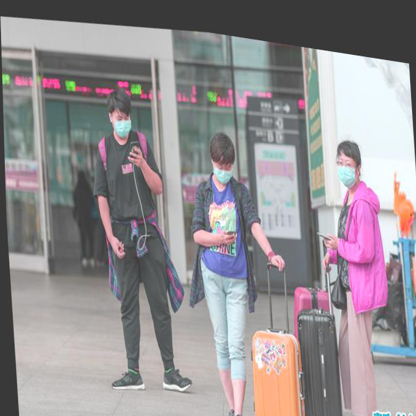

In [ ]:
num=int(input("num:"))
testex=x_train[num,:,:,:]
print(testex.shape)
Image.fromarray(testex)

In [ ]:
conf=np.zeros((13,13))

for i in range(4):
  conf+=y_train[num,:,:,i,0]
conf

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#Old Models (didn't worked but i didn't tried transfer learning)

In [ ]:
# x_input=layers.Input(shape=(100,100,3))
# x=layers.Conv2D(32,(3,3),activation='relu')(x_input)
# x=layers.Conv2D(64,(5,5),activation='relu')(x)
# x=layers.Conv2D(64,(7,7),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# x=layers.Conv2D(32,(7,7),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# x=layers.Conv2D(16,(7,7),activation='relu')(x)
# x=layers.Conv2D(7,(4,4),activation='relu')(x)
# x=layers.MaxPooling2D((2,2))(x)
# output=layers.Conv2D(7,(1,1),activation='sigmoid')(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# x_input=layers.Input(shape=(100,100,3))
# x=layers.Conv2D()

In [ ]:
#normalize the inputs
def norm(x):
  return (x/255)

# x_train=norm(x_train)
# x_val=norm(x_val)

In [ ]:
# x_input=layers.Input(shape=(targetsize,targetsize,3))
# x=layers.Conv2D(32,(7,7))(x_input)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(64,(5,5))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(128,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(256,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.7)(x)

# x=layers.Conv2D(512,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.5)(x)

# x=layers.Conv2D(512,(3,3))(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# # x=layers.Dropout(0.5)(x)

# x=layers.Flatten()(x)

# x=layers.Dense(256)(x)
# # x=layers.Dropout(0)(x)

# x=layers.Dense(256)(x)
# # x=layers.Dropout(0)(x)

# x=layers.Dense((numofgrids*numofgrids)*7,activation='linear')(x)
# output=layers.Reshape((numofgrids,numofgrids,7))(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# x_input=layers.Input(shape=(targetsize,targetsize,3))
# x=layers.Conv2D(32,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x_input)
# x=layers.Conv2D(64,(3,3),kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# skip1=x                #################################first skip connection                       #
#                                                                                                     #
# x=layers.Conv2D(64,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)     #
# x=layers.BatchNormalization()(x)                                                                    #
# x=layers.LeakyReLU(alpha=0.1)(x)                                                                  
# x=layers.Conv2D(64,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# #x=layers.Dropout(0.8)(x)

# x=layers.Conv2D(64,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip1,x])#################################first skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(128,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.8)(x)
# skip2=x#################################second skip connection

# x=layers.Conv2D(128,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(128,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# #x=layers.Dropout(0.8)(x)

# x=layers.Conv2D(128,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip2,x])#################################second skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(256,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.8)(x)
# skip3=x#################################third skip connection

# x=layers.Conv2D(256,(1,1),padding='valid',kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Conv2D(256,(3,3),padding='same',kernel_initializer=keras.initializers.he_uniform())(x)
# #x=layers.add([skip3,x])#################################third skip connection
# x=layers.BatchNormalization()(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.MaxPooling2D((2,2))(x)
# #x=layers.Dropout(0.9)(x)

# x=layers.Flatten()(x)

# x=layers.Dense(128,kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Dropout(0.9)(x)

# x=layers.Dense(128,kernel_initializer=keras.initializers.he_uniform())(x)
# x=layers.LeakyReLU(alpha=0.1)(x)
# x=layers.Dropout(0.9)(x)

# x=layers.Dense((numofgrids*numofgrids)*7,activation='linear')(x)
# output=layers.Reshape((numofgrids,numofgrids,7))(x)

# model=Model(inputs=x_input,outputs=output)
# model.summary()

In [ ]:
# intersection_over_union(K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32'),K.variable([0.25, 0.35, 0.3, 0.1],dtype='float32'))

#Making Model(YOLO V2)

In [ ]:
##################################################################YOLOV2#############################################################
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda, LeakyReLU, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import tensorflow.keras.backend as K
import tensorflow as tf

# the function to implement the orgnization layer (thanks to github.com/allanzelener/YAD2K)
def space_to_depth_x2(x):
    return tf.nn.space_to_depth(x, block_size=2)

input_image = Input(shape=(416, 416, 3))
#true_boxes  = Input(shape=(1, 1, 1, TRUE_BOX_BUFFER , 4))

# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 10
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 11
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 12
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 13
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = LeakyReLU(alpha=0.1)(x)

skip_connection = x

x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 14
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 15
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 16
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 17
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 18
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
x = BatchNormalization(name='norm_18')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 19
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
x = BatchNormalization(name='norm_19')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 20
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
x = BatchNormalization(name='norm_20')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 21
skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_21')(skip_connection)
skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)

x = concatenate([skip_connection, x])

# Layer 22
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
x = BatchNormalization(name='norm_22')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 23
x = Conv2D(int(tf.shape(ANCHORS)[0])  * (4 + 1 + len(labels)), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
output = Reshape((13, 13 , int(tf.shape(ANCHORS)[0]) , 4 + 1 + len(labels)))(x)

# x = Conv2D(4 * (4 + 1 + 2), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
# output = Reshape((13, 13, 4, 4 + 1 + 2))(x)

# small hack to allow true_boxes to be registered when Keras build the model 
# for more information: https://github.com/fchollet/keras/issues/2790
#output = Lambda(lambda args: args[0])([output, true_boxes])

model = Model(input_image, output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, 416, 416, 32) 0           norm_1[0][0]                     
____________________________________________________________________________________________

#Loading pre-trained weights

In [ ]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2021-05-01 05:41:13--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights.1’

yolov2.weights.1    100%[===================>] 194.49M  46.2MB/s    in 4.5s    

2021-05-01 05:41:18 (42.8 MB/s) - ‘yolov2.weights.1’ saved [203934260/203934260]



In [ ]:
path_to_weight = "./yolov2.weights"

class WeightReader:
    def __init__(self, weight_file):
        self.offset = 4
        self.all_weights = np.fromfile(weight_file, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]
    
    def reset(self):
        self.offset = 4
                
weight_reader = WeightReader(path_to_weight)
print("all_weights.shape = {}".format(weight_reader.all_weights.shape))

all_weights.shape = (50983565,)


In [ ]:
weight_reader.reset()
nb_conv = 23

for i in range(1, nb_conv+1):
    conv_layer = model.get_layer('conv_' + str(i))
    
    if i < nb_conv:
        norm_layer = model.get_layer('norm_' + str(i))
        
        size = np.prod(norm_layer.get_weights()[0].shape)

        beta  = weight_reader.read_bytes(size)
        gamma = weight_reader.read_bytes(size)
        mean  = weight_reader.read_bytes(size)
        var   = weight_reader.read_bytes(size)

        weights = norm_layer.set_weights([gamma, beta, mean, var])       
        
    if len(conv_layer.get_weights()) > 1:
        bias   = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel, bias])
    else:
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel])

In [ ]:
layer   = model.layers[-2] # the last convolutional layer
weights = layer.get_weights()

new_kernel = np.random.normal(size=weights[0].shape)/(13*13)
new_bias   = np.random.normal(size=weights[1].shape)/(13*13)

layer.set_weights([new_kernel, new_bias])

In [ ]:
# weights[].shape
for w in weights:
  print(w.shape)

(1, 1, 1024, 28)
(28,)


#Testing IOU Function

In [ ]:
a=K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32')
b=K.variable([0.25, 0.35, 0.3, 0.1],dtype='float32')
dem=K.variable([-4, -6, 2, 2],dtype='float32')
dem2=K.variable([-4, -6, 2, 2],dtype='float32')
# intersection_over_union(K.variable([0.25, 0.15, 0.3, 0.1],dtype='float32'),)
intersection_over_union(dem,dem2)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.99999976], dtype=float32)>

In [ ]:
obj=y_train[12:13,:,:,:,0]==1
intersection_over_union(K.variable(y_train[12:13,:,:,:,1:5][obj],dtype='float32'),K.variable(y_train[12:13,:,:,:,1:5][obj],dtype='float32'))
#y_train[12,1,1,1:5]

<tf.Tensor: shape=(80, 1), dtype=float32, numpy=
array([[0.9999968 ],
       [0.9999961 ],
       [0.99999565],
       [0.9999863 ],
       [0.9999905 ],
       [0.9999953 ],
       [0.9999937 ],
       [0.99999547],
       [0.9999956 ],
       [0.9999954 ],
       [0.9999956 ],
       [0.99999243],
       [0.9999954 ],
       [0.99999666],
       [0.9999964 ],
       [0.99999624],
       [0.9999943 ],
       [0.9999954 ],
       [0.99999607],
       [0.99999577],
       [0.9999957 ],
       [0.9999952 ],
       [0.99999756],
       [0.9999977 ],
       [0.9999969 ],
       [0.9999968 ],
       [0.9999963 ],
       [0.9999966 ],
       [0.99999493],
       [0.9999965 ],
       [0.9999975 ],
       [0.99999714],
       [0.99999696],
       [0.99999785],
       [0.9999973 ],
       [0.99999666],
       [0.99999624],
       [0.9999962 ],
       [0.9999983 ],
       [0.9999979 ],
       [0.99999815],
       [0.99999833],
       [0.999998  ],
       [0.9999981 ],
       [0.9999978 ],
      

#Yolo Loss Function

In [ ]:
def custom_loss(y_true,y_pred):
  y_true_class=y_true[...,5:]
  y_pred_class=y_pred[...,5:]

  y_true_xy=y_true[...,1:3]
  y_pred_xy=y_pred[...,1:3]

  y_true_wh=y_true[...,3:5]
  y_pred_wh=y_pred[...,3:5]

  y_true_conf=y_true[...,0:1]
  y_pred_conf=y_pred[...,0:1]

  obj=y_true[...,0]==1            #index of cells which have objects
  noobj=y_true[...,0]==0          #index of cells which does not have objects

  #no obj loss
  noobj_loss=tf.reduce_mean(K.binary_crossentropy((y_true_conf[noobj]),(y_pred_conf[noobj]),from_logits=True))

  #obj loss
  #print(ANCHORS)
  anchors=K.reshape(ANCHORS,(1,1,1,4,2))
  #print('K.exp(y_pred_wh)',K.exp(y_pred_wh))
  #print('K.exp(y_pred_wh)',K.exp(y_pred_wh)*anchors)
  box_pred=K.concatenate([K.sigmoid(y_pred_xy),(y_pred_wh)],axis=-1)
  ious=intersection_over_union(box_pred[obj],y_true[...,1:5][obj])
  #print('box_pred[obj]',box_pred[obj].shape)
  #print('ious',ious.shape)
  #print('ious',ious)
  #obj_loss=tf.reduce_mean(K.mean(K.square((ious*y_true_conf[obj]) - K.sigmoid(y_pred_conf[obj])), axis=-1))
  obj_loss=tf.reduce_mean(K.binary_crossentropy((ious*y_true_conf[obj]),K.sigmoid( y_pred_conf[obj]), ))
  #real_obj_loss=tf.reduce_mean(K.binary_crossentropy((y_true_conf[obj]),( y_pred_conf[obj]), from_logits=True))

  #box cordinate loss                                                                                                                    (1e-16 + target[..., 3:5] / anchors)
  box_loss=tf.reduce_mean(K.mean(K.square(K.concatenate([y_true[...,1:3],(y_true[...,3:5])])[obj]-K.concatenate([K.sigmoid(y_pred[...,1:3]), ( y_pred[...,3:5]) ])[obj]), axis=-1))

  # xy_loss=tf.reduce_mean(K.mean(K.square(  K.square((y_true[...,1:2][obj])-K.sigmoid(y_pred[...,1:2][obj])) + K.square((y_true[...,2:3][obj])-K.sigmoid(y_pred[...,2:3][obj])) ), axis=-1))
  # wh_loss=tf.reduce_mean(K.mean(K.square(  K.square(K.sqrt(y_true[...,3:4][obj])-K.sqrt(y_pred[...,3:4][obj])) + K.square(K.sqrt(y_true[...,4:5][obj])-K.sqrt(y_pred[...,4:5][obj])) ), axis=-1))
  # box_loss=xy_loss+wh_loss
  #class loss
  class_loss=tf.reduce_mean(K.categorical_crossentropy((y_true_class[obj]),(y_pred_class[obj]),from_logits=True))

  # tf.print(" ",output_stream=sys.stdout)
  # tf.print("noobjloss",noobj_loss,output_stream=sys.stdout)
  # tf.print("objloss",obj_loss,output_stream=sys.stdout)
  # tf.print("ious",tf.reduce_mean(ious),output_stream=sys.stdout)
  # tf.print("boxloss",box_loss,output_stream=sys.stdout)
  # tf.print("classloss",class_loss,output_stream=sys.stdout)
  # tf.print(" ",output_stream=sys.stdout)

  #return ((1.4*noobj_loss)+(1*obj_loss)+(0.9*class_loss)+(5*box_loss))  ### this
  #return ((0*noobj_loss)+(0*obj_loss)+(0*class_loss)+(1*box_loss))  ### this
  return ((2.4*noobj_loss)+(2.2*obj_loss)+(3*class_loss)+(15*box_loss))           #((2*noobj_loss)+(1.8*obj_loss)+(1*class_loss)+(15*box_loss))  best rn
  #return ((2.4*noobj_loss)+(1.9*obj_loss)+(1.5*class_loss)+(15*box_loss))           # bestest rn
  #return ((12*noobj_loss)+(2*obj_loss)+(5*class_loss)+(16*box_loss))##############  ((2.2*noobj_loss)+(1.8*obj_loss)+(1.5*class_loss)+(15*box_loss)) more better lesser false positives
  #return ((10*noobj_loss)+(2*obj_loss)+(5*class_loss)+(10*box_loss))               #((2.4*noobj_loss)+(1.8*obj_loss)+(1.5*class_loss)+(15*box_loss)) best till now

In [ ]:
custom_loss(K.variable(y_train[0:5,...],dtype='float32'),K.variable(y_train[0:5,...],dtype='float32'))

<tf.Tensor: shape=(), dtype=float32, numpy=4.7208962>

# Training

In [ ]:
from keras.optimizers import Adam,SGD
model.compile(loss=custom_loss,optimizer=Adam(lr=0.001,decay=1e-20))
# ,decay=1e-20

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=16,epochs=100)
#history=model.fit(x_train,y_train,batch_size=64,epochs=50,)
#history=model.fit(x_val,y_val,validation_data=(x_train,y_train),batch_size=128,epochs=30,verbose=2)

Epoch 1/100
20/20 [==============================] - 11s 368ms/step - loss: 35.3054 - val_loss: 2107989.2500
Epoch 2/100
20/20 [==============================] - 7s 334ms/step - loss: 8.2940 - val_loss: 4474.7915
Epoch 3/100
20/20 [==============================] - 7s 338ms/step - loss: 5.8047 - val_loss: 615.4550
Epoch 4/100
20/20 [==============================] - 7s 341ms/step - loss: 5.1748 - val_loss: 272.8817
Epoch 5/100
20/20 [==============================] - 7s 347ms/step - loss: 4.1141 - val_loss: 48.7907
Epoch 6/100
20/20 [==============================] - 7s 350ms/step - loss: 3.4359 - val_loss: 8.7992
Epoch 7/100
20/20 [==============================] - 7s 349ms/step - loss: 2.8444 - val_loss: 5.6774
Epoch 8/100
20/20 [==============================] - 7s 343ms/step - loss: 3.1088 - val_loss: 5.6130
Epoch 9/100
20/20 [==============================] - 7s 341ms/step - loss: 3.2316 - val_loss: 6.7855
Epoch 10/100
20/20 [==============================] - 7s 339ms/step - loss:

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_train,y_train)

10/10 [==============================] - 6s 423ms/step - loss: 0.9285


0.9284840226173401

In [ ]:
model.evaluate(x_val,y_val)

1/1 [==============================] - 2s 2s/step - loss: 3.9053


3.9053499698638916

#Evaluation

In [ ]:
from PIL import Image
def sigmoid(z):
   z=1/(1+np.exp(-z))
   return z
def rescale(x):
  return (x*255)

In [ ]:
# img=Image.open('apple3.jpg')
# img=img.resize((100,100))
# img=np.array(img)
# test=img
# Image.fromarray(test)

In [ ]:
y_val=listtolabels(get_bounding_box(val_annotations_dir),targetsize,numofgrids,labels,ANCHORS)
vallist=gettrainingimagenames(val_annotations_dir,val_image_dir)
x_val=loadimg(vallist,targetsize)
x_val=np.uint8(x_val)

[1, 1, 1, 1, 1]
number of objects: 5

Width: 968
Height: 681 

1 objects in  1 , 7
anchor  1 iou= 0.45658493
class: 1 mask
1 objects in  2 , 3
anchor  0 iou= 0.827328
class: 1 mask
1 objects in  2 , 5
anchor  0 iou= 0.46570024
class: 1 mask
1 objects in  2 , 9
anchor  0 iou= 0.3951888
class: 1 mask
1 objects in  7 , 2
anchor  0 iou= 0.7293935
class: 1 mask
[1]
number of objects: 1

Width: 640
Height: 959 

1 objects in  2 , 5
anchor  1 iou= 0.4215622
class: 1 mask
[0, 0, 1]
number of objects: 3

Width: 640
Height: 960 

1 objects in  3 , 6
anchor  1 iou= 0.52788365
class: 1 mask
1 objects in  4 , 11
anchor  1 iou= 0.7686416
class: 0 no-mask
1 objects in  5 , 1
anchor  1 iou= 0.50240517
class: 0 no-mask
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
number of objects: 10

Width: 1200
Height: 800 

1 objects in  4 , 8
anchor  0 iou= 0.57213205
class: 1 mask
1 objects in  5 , 1
anchor  0 iou= 0.8782887
class: 1 mask
1 objects in  5 , 2
anchor  0 iou= 0.42086607
class: 1 mask
1 objects in  5 , 3
anchor  0

In [ ]:
# c=int(input('no.'))
# img=x_val[c,:,:,:]
# test=img
# Image.fromarray(test)

# print(y_val[c,:,:,0])
# print('predict')
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL


def show(test,numofgrids,val):
  if val:
    c=int(input('no.'))
    img=x_val[c,:,:,:]
    test=img
    Image.fromarray(test)
    conf=np.zeros((numofgrids,numofgrids))
    # print(conf,'\n\n')
    for i in range(int(tf.shape(ANCHORS)[0])):
      conf+=y_val[c,:,:,i,0]
    print(conf)
    print('predict')
  else:
    img=test
  # trues=(y_train[c,:,:,:,0]==1)
  test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
  test.shape
  pred=model.predict(test)
  pred1=np.array(pred)
  #print('see pred',pred)
  pred[0,:,:,:,0:3]=sigmoid(pred[0,:,:,:,0:3])
  pred[0,:,:,:,5:]=sigmoid(pred[0,:,:,:,5:])
  # print('see pred',pred[0,:,:,:,0][trues])
  # print(((pred[0,:,:,0]>0.7)*1).reshape([numofgrids,numofgrids]))
  # print(pred[0,:,:,0])
  conf=np.zeros((numofgrids,numofgrids))
  pred1[...,0]=(pred1[0,:,:,:,0]>0.7)*1
  for i in range(int(tf.shape(ANCHORS)[0])):
    conf+=pred1[0,:,:,i,0]
  print('\n\n',conf)
  #pred[...,1:3]=sigmoid(pred[...,1:3])
  pred1[...,5:]=sigmoid(pred[...,5:])
  test=img
  outputs=[]    #list of all boxes
  for i in range(numofgrids):
    for j in range(numofgrids):
      for k in range(int(tf.shape(ANCHORS)[0])):
        objects={}    #dict of details of a box
        if  (pred1[0,i,j,k,0]==1):
          print("object")
          x=j*int(targetsize/numofgrids)
          y=i*int(targetsize/numofgrids)
          print('x',x,'y',y)
          xincell=pred[0,i,j,k,1]*int(targetsize/numofgrids)
          yincell=pred[0,i,j,k,2]*int(targetsize/numofgrids)
          print('final x,y:',int(x+xincell),",",int(y+yincell))
          uppercornerx=int(x+xincell)-int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          uppercornery=int(y+yincell)-int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)
        
          lowercornerx=int(x+xincell)+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)/2)
          lowercornery=int(y+yincell)+int(pred[0,i,j,k,4]*int(targetsize/numofgrids)/2)

          print('width',pred[0,i,j,k,3]*int(targetsize/numofgrids))
          print('height',pred[0,i,j,k,4]*int(targetsize/numofgrids))
          print(pred[0,i,j,k,5:])
          print("class ",np.argmax(pred[0,i,j,k,5:]))

          objects['prob']=pred[0,i,j,k,0]#*np.max(pred[0,i,j,k,5:])
          objects['x']=int(x+xincell)
          objects['y']=int(y+yincell)
          objects['w']=int(pred[0,i,j,k,3]*int(targetsize/numofgrids))
          objects['h']=int(pred[0,i,j,k,4]*int(targetsize/numofgrids))
          objects['class']=labels[np.argmax(pred[0,i,j,k,5:])]

          # # print(objects)
          # for l in range(len(labels)):
          #   if (np.argmax(pred[0,i,j,k,5:])==l):
          #     rgb=color_list[l,:]
          
          # test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+int(pred[0,i,j,k,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
          # test[K.clip(lowercornery-int(pred[0,i,j,k,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

          # test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb
          # test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,k,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb


          # test[K.clip(int(y+yincell),min_value=0,max_value=targetsize-1),K.clip(int(x+xincell),min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
          # # test[uppercornery,uppercornerx,:]=[0,0,255]
          # # test[lowercornery,lowercornerx,:]=[0,0,255]
          outputs.append(objects)
  # print(outputs)
  return test,outputs

In [ ]:
def displayimage(outputs,test):
  for dout in outputs:
    x,y,w,h,p,c=dout['x'],dout['y'],dout['w'],dout['h'],dout['prob'],dout['class']
    for i,l in enumerate(labels):
      if (c==l):
        rgb=color_list[i,:]
    uppercornerx=int(x-(w/2))
    uppercornery=int(y-(h/2))
    lowercornerx=int(x+(w/2))
    lowercornery=int(y+(h/2))
    test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+h,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
    test[K.clip(lowercornery-h,min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

    test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+w,min_value=0,max_value=targetsize-1),:]=rgb
    test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+w,min_value=0,max_value=targetsize-1),:]=rgb


    test[K.clip(y,min_value=0,max_value=targetsize-1),K.clip(x,min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
  return test

In [ ]:
def nms(outputs,iou_threshold=0.5):
  nmslist=[]
  while outputs:
    choosen_box=outputs.pop(0)
    outputs= [
              out
              for out in outputs
              if out['class']!=choosen_box['class']
              or intersection_over_union(K.variable([choosen_box['x'],choosen_box['y'],choosen_box['w'],choosen_box['h']],dtype='float32'),K.variable([out['x'],out['y'],out['w'],out['h']],dtype='float32')
              )<iou_threshold
    ]
    nmslist.append(choosen_box)
  return nmslist

In [ ]:
def nmsold(outputs,iou_threshold=0.5):
  ious=[]
  outs=[]
  for l in labels:
    for i in range(len(outputs)):
      ious=[]
      objects={}
      if (outputs[i]['class']==l):
        out=outputs[i]
        # x,y,w,h,p,c=outputs[i]['x'],outputs[i]['y'],outputs[i]['w'],outputs[i]['h'],outputs[i]['prob'],outputs[i]['class']
        print(outputs[i]['class'])
        for j in range(len(outputs)):
          if (outputs[j]['class']==l):
            x1,y1,w1,h1,p1,c1=outputs[j]['x'],outputs[j]['y'],outputs[j]['w'],outputs[j]['h'],outputs[j]['prob'],outputs[j]['class']
            iou=intersection_over_union(K.variable([out['x'],out['y'],out['w'],out['h']],dtype='float32'),K.variable([x1,y1,w1,h1],dtype='float32'))
            iou=np.array(iou)
            if iou[0]>iou_threshold:
              ious.append(j)
              ious.append(iou[0])
              print("see",iou[0],'prob',outputs[j]['prob'])
            # print('iou',iou[0])
            # if iou>iou_threshold:
            #   print('yes')
        ious=np.array(ious)
        ious=np.reshape(ious,[int(len(ious)/2),2])
        trues=ious[:,1]>=iou_threshold
        # print(ious[:,0][trues])
        best=0
        bestidx=0
        for index in ious[:,0][trues]:
          # print('index',int(index))
          if (outputs[int(index)]['prob']>best):
            best=outputs[int(index)]['prob']
            bestidx=int(index)
        
        objects=outputs[bestidx]
        outs.append(objects)
  #print(ious.reshape(int((len(ious)/2),2)))
  newouts=[]
  ctr=0
  for nout in outs:
    ctr=0
    for newout in newouts:
      if nout==newout:
        ctr+=1
    if ctr==0:
      newouts.append(nout)
  return newouts

In [ ]:
out=[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150},
 {'class': 'mask', 'h': 146, 'prob': 0.95790416, 'w': 89, 'x': 306, 'y': 162}]

In [ ]:
t2_boxes = [
            {'class':'no-mask', 'prob':1, 'x':0.5, 'y':0.45, 'w':0.4, 'h':0.5},
            {'class':'mask', 'prob':0.9, 'x':0.5, 'y':0.5, 'w':0.2, 'h':0.4},
            {'class':'no-mask', 'prob':0.8, 'x':0.25, 'y':0.35, 'w':0.3, 'h':0.1},
            {'class':'no-mask', 'prob':0.05, 'x':0.1, 'y':0.1, 'w':0.1, 'h':0.1},
        ]

In [ ]:
nmsold(out,iou_threshold=0.1)

mask
see 1.0 prob 0.93672496
mask
see 1.0 prob 0.68751556
mask
see 1.0 prob 0.95911425
mask
see 1.0 prob 0.9432062
see 0.8743278 prob 0.95790416
mask
see 1.0 prob 0.9386845
mask
see 0.8743278 prob 0.9432062
see 1.0 prob 0.95790416


[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 146, 'prob': 0.95790416, 'w': 89, 'x': 306, 'y': 162},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150}]

In [ ]:
nms(out,iou_threshold=0.1)

[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150}]

In [ ]:
def draw_boxes(out,img):
    plt.imshow(img)
    # get the context for drawing boxes
    ax = plt.gca()
    labelindex =0
    # plot each box
    for i in range(len(out)):
      #by retrieving the coordinates from each bounding box and creating a Rectangle object.
      box = out[i]
      # get coordinates
      # calculate width and height of the box
      x1, y1, width, height = box['x']-(box['w']/2) , box['y']-(box['h']/2) ,  box['w'] , box['h']
      # finding label index
      for index,l in enumerate(labels):
        if box['class']==l:
          labelindex=index
    
      # create the shape
      rect = Rectangle((x1, y1), width, height, fill=False, color=colors[labelindex]) 
      # draw the box
      ax.add_patch(rect)
      # draw text and score in top left corner
      label = "%s (%.3f)" % (box['class'], box['prob'])
      plt.text(x1, y1, label, color='white')
    # show the plot
    plt.savefig('test.jpg',dpi=200)
draw_boxes

<function __main__.draw_boxes>



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 192
final x,y: 170 , 197
width 164.89697265625
height 260.5392761230469
[0.00212654 0.9968299 ]
class  1
[{'prob': 0.745844, 'x': 170, 'y': 197, 'w': 164, 'h': 260, 'class': 'mask'}]


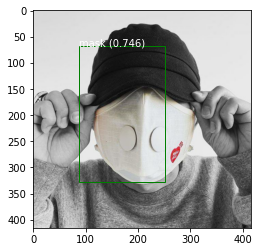

In [ ]:
img=Image.open('w3.jpeg')
img=img.resize((targetsize,targetsize))
img=np.array(img)
test=img
img,out=show(test,numofgrids,val=False)
out=nms(out)
print(out)

# plt.imshow(displayimage(out,img))
draw_boxes(out,img)

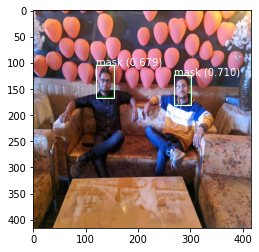

In [ ]:
draw_boxes(out,img)

no.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predict


 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 

[{'class': 'mask', 'h': 107, 'prob': 0.7639176, 'w': 66, 'x': 247, 'y': 62},
 {'class': 'mask', 'h': 70, 'prob': 0.71728694, 'w': 44, 'x': 100, 'y': 75},
 {'class': 'mask', 'h': 83, 'prob': 0.65166795, 'w': 51, 'x': 181, 'y': 88},
 {'class': 'mask', 'h': 114, 'prob': 0.63366085, 'w': 60, 'x': 301, 'y': 93}]

array([[[ 90,  92,  91],
        [ 90,  92,  91],
        [ 90,  92,  91],
        ...,
        [211, 211, 184],
        [200, 205, 178],
        [193, 205, 176]],

       [[ 96,  98,  97],
        [ 96,  98,  97],
        [ 96,  98,  97],
        ...,
        [212, 214, 186],
        [193, 201, 172],
        [173, 187, 158]],

       [[102, 104, 103],
        [102, 104, 103],
        [102, 104, 103],
        ...,
        [210, 216, 186],
        [192, 203, 172],
        [162, 178, 147]],

       ...,

       [[123, 113, 111],
        [123, 113, 111],
        [123, 113, 111],
        ...,
        [ 92,  81,  77],
        [ 94,  83,  79],
        [ 95,  84,  80]],

       [[123, 113, 111],
        [123, 113, 111],
        [123, 113, 111],
        ...,
        [ 94,  83,  79],
        [ 96,  85,  81],
        [ 97,  86,  82]],

       [[121, 111, 109],
        [121, 111, 109],
        [121, 111, 109],
        ...,
        [ 94,  83,  79],
        [ 96,  85,  81],
        [ 99,  88,  84]]

TypeError: ignored

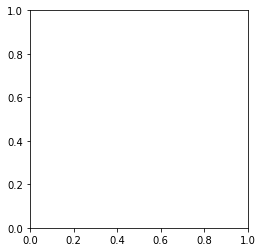

In [ ]:
import PIL
import matplotlib.pyplot as plt
plt.figure()
img,out=show([],numofgrids,val=True)
out=nms(out,iou_threshold=0.5)

# plt.imshow(displayimage(out,img))
draw_boxes(out,img)

In [ ]:
out

[{'class': 'mask', 'h': 124, 'prob': 0.93672496, 'w': 68, 'x': 136, 'y': 121},
 {'class': 'mask', 'h': 116, 'prob': 0.68751556, 'w': 63, 'x': 35, 'y': 152},
 {'class': 'mask', 'h': 153, 'prob': 0.95911425, 'w': 86, 'x': 204, 'y': 145},
 {'class': 'mask', 'h': 150, 'prob': 0.9432062, 'w': 83, 'x': 306, 'y': 157},
 {'class': 'mask', 'h': 133, 'prob': 0.9386845, 'w': 72, 'x': 381, 'y': 150},
 {'class': 'mask', 'h': 146, 'prob': 0.95790416, 'w': 89, 'x': 306, 'y': 162}]

To see results on val data



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 64 y 64
final x,y: 90 , 76
width 83.24252319335938
height 144.32994079589844
[0.00786694 0.99237263]
class  1
object
x 288 y 128
final x,y: 318 , 157
width 84.94598388671875
height 136.4083251953125
[0.01610169 0.9841106 ]
class  1
object
x 128 y 160
final x,y: 141 , 175
width 33.9042854309082
height 55.9335823059082
[0.01494118 0.98416615]
class  1
object
x 192 y 160
final x,y: 223 , 177
width 44.52030944824219
height 76.61148071289062


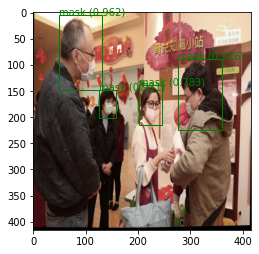



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 128
final x,y: 181 , 133
width 36.660240173339844
height 73.81108856201172
[0.00645115 0.99299204]
class  1
object
x 256 y 128
final x,y: 259 , 146
width 52.611228942871094
height 87.41576385498047
[0.0033422 0.9962029]
class  1
object
x 320 y 160
final x,y: 331 , 167
width 44.70723342895508
height 85.04499816894531
[0.01496919 0.98383754]
class  1
object
x 0 y 192
final x,y: 26 , 200
width 38.890872955322266
height 58.443439483642

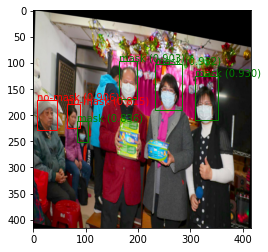



 [[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 0
final x,y: 229 , 28
width 26.307828903198242
height 54.246986389160156
[0.9768206  0.02257195]
class  0
object
x 256 y 0
final x,y: 262 , 24
width 23.69161033630371
height 48.176326751708984
[0.985551   0.01389551]
class  0
object
x 320 y 0
final x,y: 329 , 20
width 40.737430572509766
height 41.631004333496094
[0.02423722 0.9745368 ]
class  1
object
x 64 y 32
final x,y: 78 , 35
width 22.340049743652344
height 43.12696075439453
[0

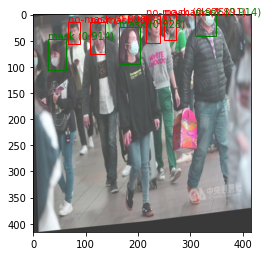



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 64
final x,y: 182 , 73
width 142.87388610839844
height 143.8432159423828
[0.00100474 0.9988457 ]
class  1
object
x 160 y 64
final x,y: 177 , 69
width 178.13706970214844
height 173.83004760742188
[0.00505592 0.9936405 ]
class  1


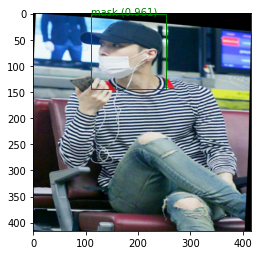



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 64 y 32
final x,y: 94 , 62
width 93.26634216308594
height 131.36244201660156
[0.00624363 0.99381   ]
class  1
object
x 96 y 32
final x,y: 97 , 61
width 90.6038589477539
height 124.6987075805664
[0.01229655 0.98737514]
class  1
object
x 288 y 32
final x,y: 310 , 49
width 52.981624603271484
height 86.04928588867188
[0.01350002 0.9856425 ]
class  1
object
x 288 y 32
final x,y: 309 , 53
width 62.41952896118164
height 97.60640716552734
[0.013

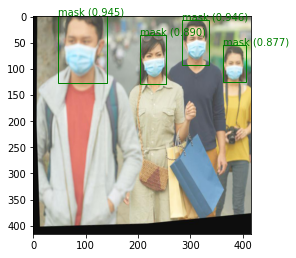



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 128
final x,y: 221 , 144
width 383.43365478515625
height 374.61297607421875
[0.00231458 0.99767643]
class  1
object
x 192 y 128
final x,y: 207 , 154
width 210.3605194091797
height 302.5940246582031
[4.7469133e-04 9.9915957e-01]
class  1
object
x 224 y 128
final x,y: 228 , 143
width 178.0
height 283.0673828125
[0.00121862 0.99802315]
class  1


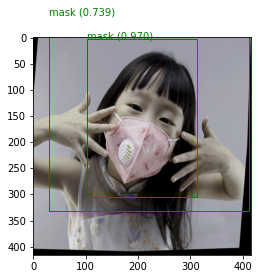



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 64 y 160
final x,y: 80 , 181
width 44.58543395996094
height 88.87493896484375
[0.00114725 0.99870574]
class  1
object
x 160 y 160
final x,y: 165 , 185
width 29.237375259399414
height 78.26151275634766
[0.01219993 0.98687845]
class  1
object
x 0 y 192
final x,y: 14 , 194
width 26.84379768371582
height 54.6218147277832
[0.00554278 0.99433184]
class  1
object
x 128 y 192
final x,y: 137 , 199
width 26.644338607788086
height 56.90653228759765

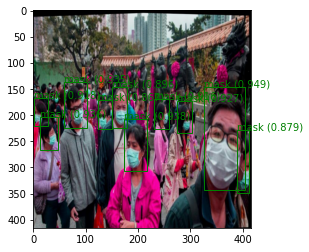



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 160
final x,y: 115 , 190
width 83.48443603515625
height 168.0498809814453
[0.01594037 0.9837637 ]
class  1
object
x 192 y 160
final x,y: 201 , 168
width 98.85365295410156
height 177.22254943847656
[0.00268695 0.99705184]
class  1
object
x 192 y 160
final x,y: 202 , 163
width 125.32598114013672
height 223.1684112548828
[0.00746388 0.9903989 ]
class  1
object
x 96 y 192
final x,y: 115 , 194
width 80.1995620727539
height 152.0165405273

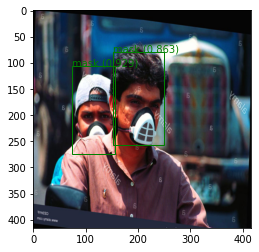



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 32 y 96
final x,y: 36 , 121
width 78.59284210205078
height 239.88661193847656
[0.2095826 0.7773219]
class  1
object
x 32 y 128
final x,y: 35 , 132
width 85.08496856689453
height 272.846923828125
[6.0667732e-04 9.9936134e-01]
class  1
object
x 320 y 160
final x,y: 344 , 185
width 88.92654418945312
height 208.02723693847656
[0.11823822 0.8832136 ]
class  1
object
x 320 y 192
final x,y: 341 , 194
width 95.33770751953125
height 238.077606201

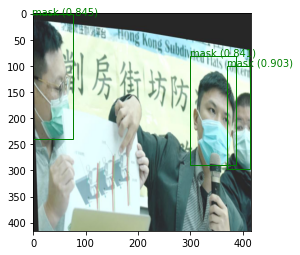



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 128
final x,y: 157 , 151
width 99.90119934082031
height 254.39126586914062
[0.00185501 0.99821705]
class  1


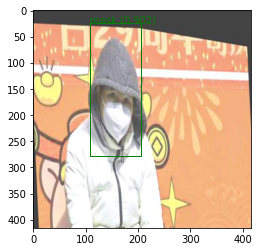



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 160
final x,y: 178 , 172
width 221.2259979248047
height 143.28871154785156
[0.00304533 0.9960861 ]
class  1
object
x 192 y 160
final x,y: 208 , 175
width 250.79879760742188
height 146.17098999023438
[0.00166614 0.9977946 ]
class  1
object
x 192 y 352
final x,y: 213 , 357
width 169.58021545410156
height 97.2130355834961
[0.00271969 0.99639016]
class  1


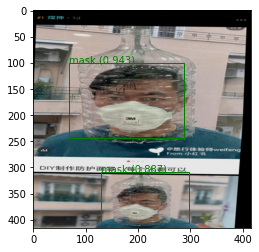



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 288 y 96
final x,y: 298 , 99
width 133.31158447265625
height 112.4506607055664
[0.01220754 0.98567665]
class  1


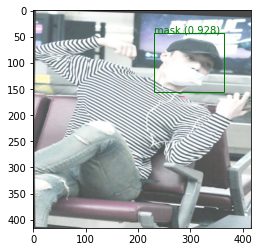



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
object
x 32 y 160
final x,y: 47 , 188
width 16.464181900024414
height 30.003803253173828
[0.0089262  0.99095285]
class  1
object
x 224 y 192
final x,y: 243 , 201
width 15.646734237670898
height 26.962739944458008
[0.02675896 0.97419655]
class  1
object
x 256 y 192
final x,y: 270 , 221
width 19.897153854370117
height 32.74818801879883
[0.00795356 0.99214876]
class  1
object
x 0 y 224
final x,y: 25 , 243
width 24.45423698425293
height 43.3944625854

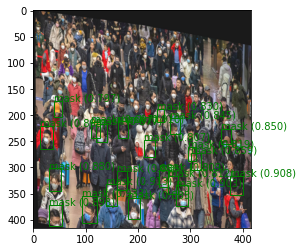



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 352 y 64
final x,y: 362 , 87
width 44.133853912353516
height 82.39736938476562
[0.01417806 0.9844748 ]
class  1
object
x 96 y 96
final x,y: 124 , 103
width 29.605581283569336
height 81.22077178955078
[0.0061324 0.9933077]
class  1
object
x 224 y 96
final x,y: 235 , 97
width 32.617496490478516
height 63.50206756591797
[0.01147881 0.98859733]
class  1


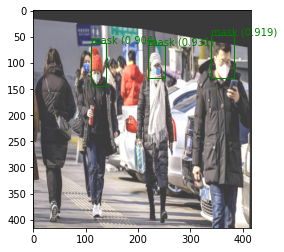



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 64
final x,y: 109 , 74
width 77.3687973022461
height 156.57186889648438
[0.00104237 0.9989716 ]
class  1
object
x 192 y 96
final x,y: 214 , 106
width 46.69340896606445
height 99.55801391601562
[0.01305847 0.98573905]
class  1
object
x 192 y 96
final x,y: 215 , 105
width 59.44316101074219
height 129.81790161132812
[0.00949994 0.9908661 ]
class  1
object
x 256 y 128
final x,y: 271 , 157
width 51.35064697265625
height 94.97645568847656

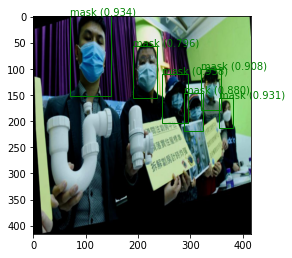



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 160
final x,y: 133 , 170
width 173.48159790039062
height 304.5273132324219
[8.136794e-04 9.986040e-01]
class  1
object
x 256 y 192
final x,y: 270 , 206
width 94.4245376586914
height 188.04736328125
[0.01390159 0.98511064]
class  1
object
x 256 y 192
final x,y: 283 , 209
width 127.38217163085938
height 234.7593994140625
[0.00584921 0.992164  ]
class  1


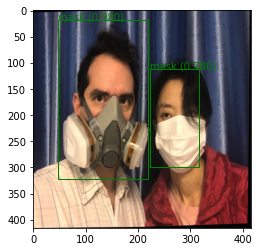



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 128
final x,y: 201 , 143
width 36.02107620239258
height 56.04378128051758
[0.03931296 0.9591708 ]
class  1
object
x 288 y 128
final x,y: 290 , 155
width 29.713497161865234
height 56.62336349487305
[0.01963613 0.98028976]
class  1
object
x 128 y 160
final x,y: 143 , 172
width 32.033573150634766
height 57.828128814697266
[0.02045696 0.9780959 ]
class  1
object
x 288 y 160
final x,y: 316 , 168
width 36.84465026855469
height 65.3918991

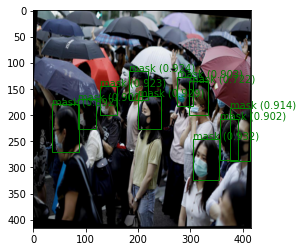



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 160
final x,y: 206 , 165
width 390.9208068847656
height 325.163818359375
[0.00372018 0.996678  ]
class  1
object
x 192 y 160
final x,y: 197 , 165
width 216.95802307128906
height 251.49777221679688
[7.0553634e-04 9.9875367e-01]
class  1


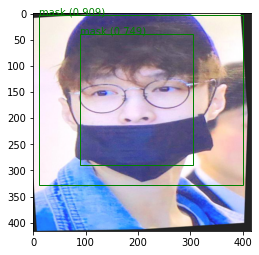



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 32
final x,y: 115 , 48
width 47.101959228515625
height 77.73175048828125
[0.00654301 0.99264246]
class  1
object
x 192 y 32
final x,y: 208 , 48
width 43.840240478515625
height 60.35252380371094
[0.00834741 0.9907437 ]
class  1
object
x 288 y 64
final x,y: 316 , 70
width 40.001705169677734
height 55.87760543823242
[0.9805069  0.01821688]
class  0
object
x 160 y 160
final x,y: 177 , 162
width 41.40732192993164
height 69.56712341308594

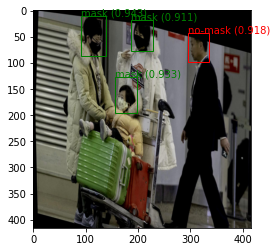



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 128
final x,y: 215 , 158
width 176.84796142578125
height 246.83529663085938
[0.00177881 0.9973124 ]
class  1
object
x 192 y 160
final x,y: 209 , 162
width 164.5645751953125
height 252.360107421875
[0.00221899 0.9968548 ]
class  1


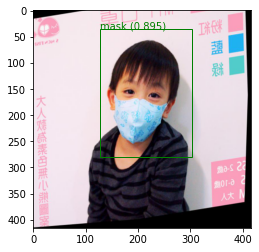



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 160
final x,y: 215 , 170
width 359.8691711425781
height 330.9937744140625
[0.00432139 0.995852  ]
class  1
object
x 192 y 160
final x,y: 201 , 170
width 194.36647033691406
height 260.2880554199219
[9.724518e-04 9.983333e-01]
class  1


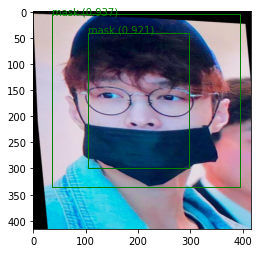



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 32
final x,y: 236 , 61
width 29.968782424926758
height 63.15909194946289
[0.00233321 0.99734026]
class  1
object
x 352 y 32
final x,y: 372 , 54
width 43.60773849487305
height 81.37445831298828
[0.00592482 0.99321836]
class  1
object
x 96 y 64
final x,y: 123 , 71
width 30.03460693359375
height 81.9083023071289
[0.00519509 0.9942061 ]
class  1
object
x 224 y 64
final x,y: 238 , 64
width 32.75593185424805
height 61.47391891479492
[0.0

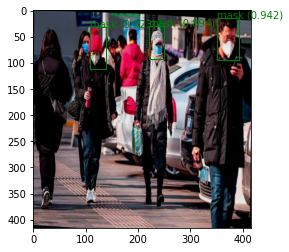



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 64 y 160
final x,y: 77 , 179
width 42.5694694519043
height 87.38101196289062
[0.00121398 0.9986425 ]
class  1
object
x 160 y 160
final x,y: 161 , 181
width 28.640605926513672
height 77.52000427246094
[0.00347324 0.9962016 ]
class  1
object
x 0 y 192
final x,y: 13 , 192
width 25.22487449645996
height 54.437191009521484
[0.00333192 0.99669194]
class  1
object
x 128 y 192
final x,y: 132 , 195
width 26.809858322143555
height 57.1576042175293

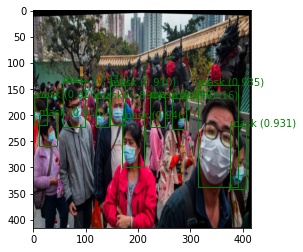



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 224
final x,y: 236 , 241
width 89.8117446899414
height 188.51974487304688
[0.00110543 0.9988819 ]
class  1


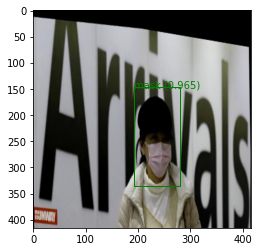



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 160
final x,y: 221 , 180
width 320.00909423828125
height 362.874755859375
[0.00408552 0.9957088 ]
class  1
object
x 224 y 160
final x,y: 250 , 177
width 324.9942626953125
height 363.5585632324219
[0.00386075 0.99609584]
class  1
object
x 256 y 160
final x,y: 276 , 172
width 329.4561767578125
height 350.4566955566406
[0.00442456 0.99560237]
class  1


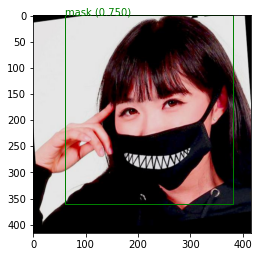



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 256 y 32
final x,y: 268 , 49
width 42.289146423339844
height 82.69498443603516
[0.0077732  0.99142766]
class  1
object
x 160 y 96
final x,y: 181 , 119
width 39.3385124206543
height 96.61981201171875
[0.00464927 0.99459696]
class  1
object
x 64 y 128
final x,y: 86 , 137
width 28.659868240356445
height 68.56097412109375
[0.00496897 0.99453557]
class  1


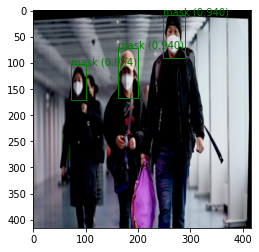



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 320 y 32
final x,y: 340 , 60
width 33.09609603881836
height 64.29598999023438
[0.00421634 0.995235  ]
class  1
object
x 96 y 64
final x,y: 119 , 89
width 30.829238891601562
height 65.24996948242188
[0.00387947 0.9955213 ]
class  1
object
x 192 y 64
final x,y: 219 , 93
width 31.154367446899414
height 66.52899169921875
[0.00680001 0.99224234]
class  1
object
x 320 y 64
final x,y: 340 , 67
width 33.77009582519531
height 64.24417877197266
[0

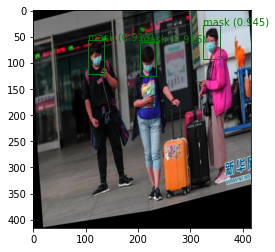



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 0 y 64
final x,y: 24 , 68
width 24.45693588256836
height 51.47087478637695
[0.01643569 0.983527  ]
class  1
object
x 64 y 64
final x,y: 69 , 87
width 22.57744789123535
height 40.52194595336914
[0.01999985 0.98008084]
class  1
object
x 160 y 64
final x,y: 166 , 70
width 73.88125610351562
height 115.17684936523438
[0.00965935 0.9895835 ]
class  1
object
x 224 y 64
final x,y: 246 , 78
width 33.511863708496094
height 52.14350128173828
[0.026

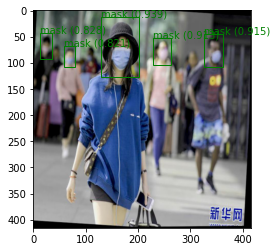



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 320 y 32
final x,y: 320 , 57
width 41.3172607421875
height 78.68083953857422
[0.01408591 0.98471016]
class  1
object
x 64 y 96
final x,y: 79 , 126
width 49.849361419677734
height 88.49970245361328
[0.00427592 0.9951951 ]
class  1
object
x 224 y 96
final x,y: 231 , 107
width 38.07952880859375
height 71.44190979003906
[0.00826153 0.99131846]
class  1
object
x 64 y 128
final x,y: 82 , 130
width 45.45488357543945
height 79.2198486328125
[0.0

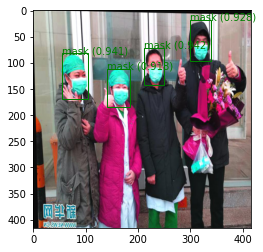

In [ ]:
import PIL
import matplotlib.pyplot as plt

for i in range(x_val.shape[0]):

  img=x_train[i,:,:,:]
  

  plt.figure()
  img,out=show(img,numofgrids,val=False)
  out=nms(out,iou_threshold=0.5)

  # plt.imshow(displayimage(out,img))
  draw_boxes(out,img)

In [ ]:
color_list=(np.random.rand(2,3)*255)
color_list.astype('int16')
color_list.shape

(2, 3)



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 2. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 32
final x,y: 247 , 60
width 65.17080688476562
height 111.73546600341797
[0.01485398 0.9853001 ]
class  1
object
x 64 y 64
final x,y: 91 , 70
width 38.9548454284668
height 69.05799102783203
[0.9162728  0.07939383]
class  0
object
x 96 y 64
final x,y: 98 , 77
width 40.78846740722656
height 72.84754943847656
[0.27115697 0.7235505 ]
class  1
object
x 160 y 64
final x,y: 181 , 90
width 51.143367767333984
height 84.75997161865234
[0.203

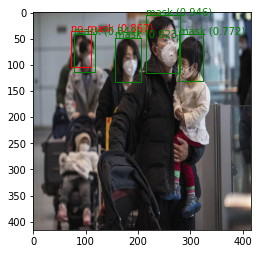



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


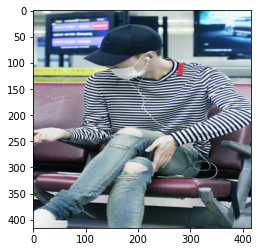



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 96
final x,y: 218 , 101
width 173.30809020996094
height 201.33421325683594
[0.00379381 0.99482334]
class  1
object
x 32 y 160
final x,y: 52 , 182
width 97.1269760131836
height 134.0526123046875
[0.5915256 0.3852768]
class  0


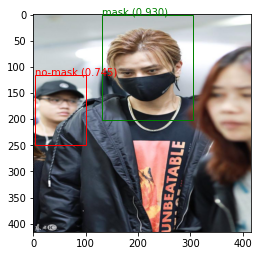



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 32 y 160
final x,y: 50 , 166
width 38.46668243408203
height 66.02054595947266
[0.03686561 0.96216524]
class  1
object
x 96 y 160
final x,y: 111 , 171
width 27.797544479370117
height 53.05152893066406
[0.02404385 0.975068  ]
class  1
object
x 192 y 160
final x,y: 203 , 164
width 26.030012130737305
height 54.08591079711914
[0.07158615 0.92990756]
class  1
object
x 352 y 160
final x,y: 357 , 173
width 25.178897857666016
height 47.7386512756

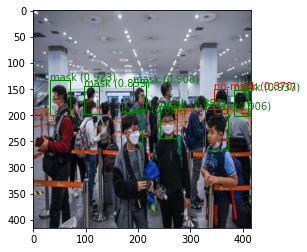



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


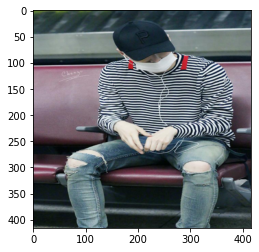



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 32
final x,y: 108 , 35
width 31.123991012573242
height 56.68046569824219
[0.01046032 0.98947   ]
class  1
object
x 224 y 32
final x,y: 254 , 55
width 46.14158630371094
height 82.43521881103516
[0.00803545 0.99087393]
class  1
object
x 0 y 64
final x,y: 16 , 72
width 26.814197540283203
height 82.08509063720703
[0.04118171 0.95691276]
class  1
object
x 320 y 160
final x,y: 347 , 176
width 41.91265106201172
height 84.7529296875
[0.0053

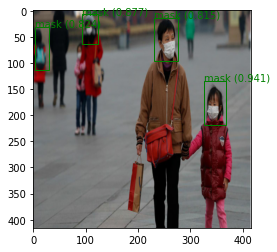



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 2. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 96
final x,y: 134 , 108
width 85.72896575927734
height 138.5064697265625
[0.05291468 0.9425507 ]
class  1
object
x 192 y 96
final x,y: 218 , 108
width 46.610755920410156
height 88.82059478759766
[0.02548119 0.97307116]
class  1
object
x 192 y 96
final x,y: 220 , 111
width 61.852874755859375
height 115.68685150146484
[0.01904586 0.98147535]
class  1
object
x 256 y 96
final x,y: 265 , 119
width 63.2697868347168
height 119.02918243408

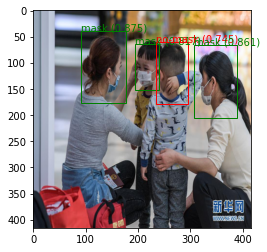



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 128
final x,y: 251 , 148
width 96.78126525878906
height 210.5228729248047
[0.00559362 0.99447894]
class  1
object
x 256 y 128
final x,y: 257 , 139
width 98.79580688476562
height 208.7689208984375
[0.00346233 0.99597174]
class  1


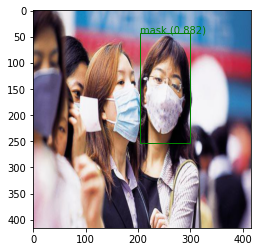



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 128
final x,y: 184 , 149
width 97.10237121582031
height 183.2732391357422
[0.00131805 0.99870455]
class  1
object
x 192 y 128
final x,y: 203 , 142
width 127.96395111083984
height 188.7036590576172
[0.00126549 0.99855393]
class  1
object
x 192 y 128
final x,y: 201 , 139
width 169.01596069335938
height 232.4798583984375
[0.00271149 0.99637467]
class  1
object
x 352 y 192
final x,y: 374 , 221
width 88.68024444580078
height 177.7617034

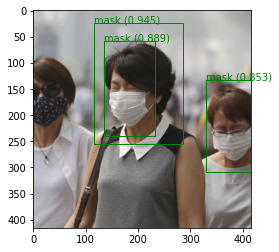



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 224
final x,y: 198 , 244
width 20.92606544494629
height 45.027496337890625
[0.64515704 0.35476726]
class  0
object
x 256 y 224
final x,y: 273 , 238
width 19.523508071899414
height 42.502830505371094
[0.7180193 0.2711431]
class  0
object
x 352 y 224
final x,y: 363 , 243
width 21.994718551635742
height 40.956260681152344
[0.27395362 0.7260429 ]
class  1


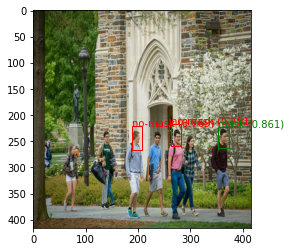



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 96
final x,y: 198 , 123
width 37.388668060302734
height 59.85243606567383
[0.00881588 0.9902806 ]
class  1
object
x 128 y 160
final x,y: 150 , 168
width 32.71016311645508
height 57.06436538696289
[0.01337682 0.9864335 ]
class  1
object
x 256 y 192
final x,y: 265 , 194
width 29.794740676879883
height 59.813541412353516
[0.00464371 0.99541473]
class  1


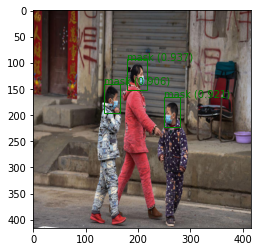



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 32
final x,y: 155 , 55
width 49.96061325073242
height 87.84419250488281
[0.7773302  0.20649073]
class  0
object
x 128 y 32
final x,y: 154 , 57
width 67.85527801513672
height 98.81122589111328
[0.5255723  0.48231125]
class  0
object
x 32 y 96
final x,y: 51 , 117
width 77.67868041992188
height 162.75196838378906
[0.0028428 0.9972819]
class  1
object
x 160 y 128
final x,y: 172 , 146
width 83.66352844238281
height 172.6747283935547
[0.

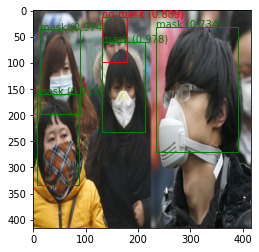



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 320 y 64
final x,y: 320 , 68
width 72.27751159667969
height 135.51402282714844
[0.831563   0.15511023]
class  0
object
x 96 y 128
final x,y: 112 , 146
width 164.34072875976562
height 290.4850158691406
[0.0012744 0.9978855]
class  1


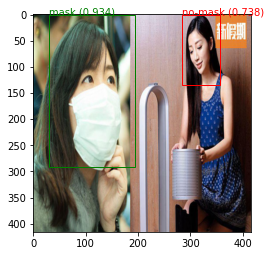



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 352 y 96
final x,y: 370 , 112
width 101.46749114990234
height 170.20965576171875
[0.70899016 0.27997363]
class  0
object
x 192 y 128
final x,y: 206 , 140
width 115.96308135986328
height 207.33486938476562
[8.761891e-04 9.990683e-01]
class  1
object
x 192 y 128
final x,y: 207 , 136
width 150.51300048828125
height 255.68576049804688
[0.00282281 0.99626595]
class  1


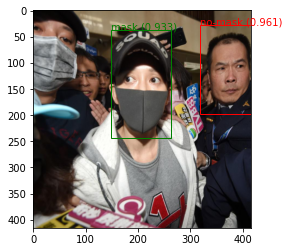



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 256 y 32
final x,y: 270 , 49
width 26.81635856628418
height 52.2265625
[0.23617555 0.7568844 ]
class  1
object
x 288 y 32
final x,y: 307 , 50
width 22.930519104003906
height 45.47121810913086
[0.05961404 0.9381247 ]
class  1
object
x 160 y 128
final x,y: 174 , 151
width 35.37995529174805
height 65.2025146484375
[0.0520351 0.9464799]
class  1
object
x 192 y 128
final x,y: 211 , 149
width 34.198001861572266
height 68.32611083984375
[0.0163

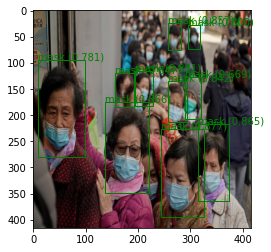



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 32
final x,y: 183 , 61
width 41.43674087524414
height 71.1593246459961
[0.07524567 0.91865844]
class  1
object
x 96 y 64
final x,y: 108 , 69
width 31.722333908081055
height 55.98996353149414
[0.00558684 0.9942631 ]
class  1
object
x 128 y 64
final x,y: 141 , 74
width 28.92780303955078
height 50.40620803833008
[0.04793001 0.95017856]
class  1
object
x 256 y 256
final x,y: 285 , 262
width 45.680301666259766
height 67.62921142578125
[

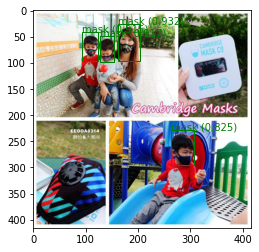



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 96
final x,y: 100 , 115
width 76.45575714111328
height 153.1241912841797
[0.00385441 0.9958677 ]
class  1
object
x 288 y 96
final x,y: 306 , 107
width 84.76846313476562
height 149.32229614257812
[0.00170307 0.99832886]
class  1
object
x 0 y 160
final x,y: 29 , 168
width 62.809017181396484
height 154.70361328125
[0.00927955 0.99116594]
class  1
object
x 160 y 160
final x,y: 178 , 190
width 79.24726104736328
height 163.6598663330078
[

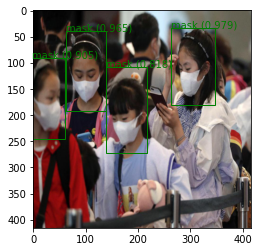



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 256 y 128
final x,y: 272 , 138
width 116.3827896118164
height 203.8033447265625
[0.0066117 0.99292  ]
class  1
object
x 256 y 128
final x,y: 273 , 141
width 147.55145263671875
height 262.9141540527344
[0.00249589 0.9964056 ]
class  1


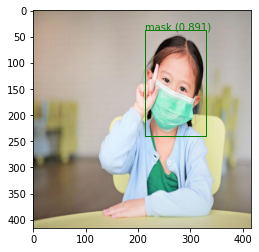



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 32
final x,y: 145 , 49
width 35.823116302490234
height 72.11788940429688
[0.00263802 0.9970342 ]
class  1
object
x 64 y 128
final x,y: 88 , 143
width 47.99648666381836
height 83.8801040649414
[0.01530553 0.983441  ]
class  1
object
x 192 y 128
final x,y: 194 , 150
width 40.96253204345703
height 80.29368591308594
[0.04135022 0.9549569 ]
class  1
object
x 288 y 128
final x,y: 300 , 148
width 38.216312408447266
height 78.8434143066406

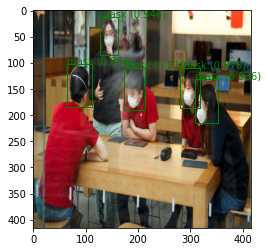



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 32
final x,y: 190 , 41
width 44.57474136352539
height 77.7539291381836
[0.01077684 0.98874843]
class  1
object
x 224 y 32
final x,y: 241 , 49
width 42.06503677368164
height 79.2220230102539
[0.03938713 0.95720047]
class  1
object
x 192 y 96
final x,y: 221 , 109
width 49.17300033569336
height 93.54353332519531
[0.00935845 0.98985755]
class  1
object
x 288 y 128
final x,y: 302 , 139
width 30.16216468811035
height 63.649681091308594
[

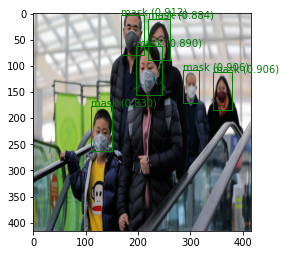



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 128 y 96
final x,y: 138 , 120
width 68.08487701416016
height 127.74541473388672
[0.00557661 0.9942114 ]
class  1
object
x 192 y 128
final x,y: 205 , 155
width 76.50843048095703
height 134.9597625732422
[0.00259218 0.9972262 ]
class  1
object
x 224 y 128
final x,y: 251 , 138
width 36.393402099609375
height 73.03538513183594
[0.07180778 0.9198627 ]
class  1
object
x 288 y 128
final x,y: 307 , 158
width 85.23026275634766
height 140.08798217

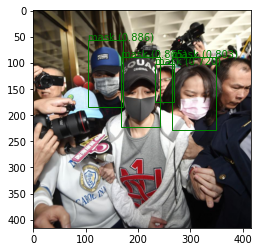



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


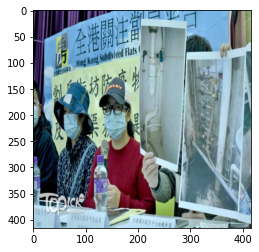



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 2. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 0 y 64
final x,y: 26 , 72
width 37.512413024902344
height 77.67245483398438
[0.04597872 0.95276815]
class  1
object
x 128 y 64
final x,y: 134 , 76
width 35.9373779296875
height 65.0899658203125
[0.0130456 0.9865763]
class  1
object
x 192 y 64
final x,y: 199 , 81
width 48.04484176635742
height 89.3392333984375
[0.03979602 0.95655954]
class  1
object
x 192 y 64
final x,y: 197 , 84
width 62.16358947753906
height 107.75723266601562
[0.017941

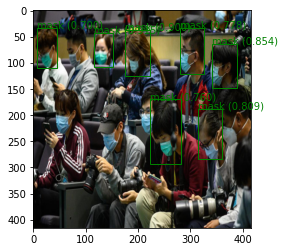



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 288
final x,y: 225 , 300
width 163.38243103027344
height 262.325927734375
[0.00188256 0.9971732 ]
class  1


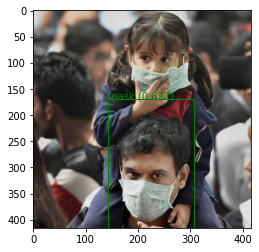



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 32 y 96
final x,y: 42 , 125
width 78.91866302490234
height 155.27944946289062
[0.01208444 0.9875673 ]
class  1
object
x 320 y 96
final x,y: 326 , 119
width 78.74578857421875
height 161.09010314941406
[0.00867718 0.9908722 ]
class  1
object
x 256 y 160
final x,y: 261 , 182
width 43.96463394165039
height 88.03826904296875
[0.00606045 0.99327916]
class  1
object
x 192 y 192
final x,y: 196 , 202
width 44.95088577270508
height 91.727043151855

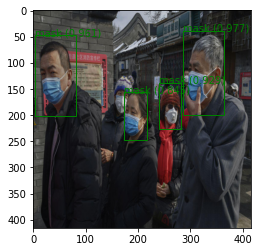



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 96
final x,y: 175 , 111
width 60.58794021606445
height 68.32440185546875
[0.04654767 0.9480139 ]
class  1
object
x 160 y 96
final x,y: 175 , 117
width 84.0008544921875
height 88.08421325683594
[0.02368051 0.9758562 ]
class  1
object
x 288 y 192
final x,y: 317 , 204
width 42.94813919067383
height 57.85115432739258
[0.06919229 0.92642593]
class  1


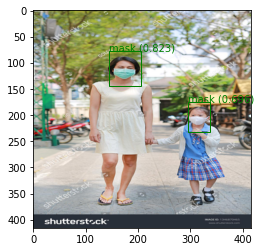



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 96 y 64
final x,y: 102 , 84
width 28.6980037689209
height 53.043296813964844
[0.03263494 0.9670543 ]
class  1
object
x 224 y 64
final x,y: 226 , 90
width 31.001951217651367
height 62.029048919677734
[0.08817015 0.9067761 ]
class  1
object
x 352 y 64
final x,y: 371 , 77
width 38.26662826538086
height 69.12191772460938
[0.00995133 0.9892697 ]
class  1
object
x 32 y 96
final x,y: 60 , 123
width 30.71881866455078
height 56.17235565185547
[0.

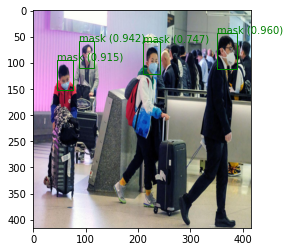



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 224 y 96
final x,y: 239 , 106
width 183.6587677001953
height 214.33026123046875
[0.00274159 0.9961289 ]
class  1


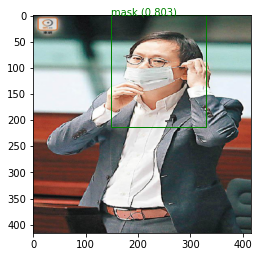



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 384 y 160
final x,y: 392 , 164
width 33.965721130371094
height 69.1512680053711
[0.02239335 0.9777284 ]
class  1
object
x 64 y 192
final x,y: 76 , 205
width 34.39608383178711
height 73.20567321777344
[0.00307638 0.9966576 ]
class  1
object
x 96 y 192
final x,y: 99 , 198
width 22.48198699951172
height 53.88557052612305
[0.01628595 0.98364127]
class  1
object
x 256 y 192
final x,y: 267 , 199
width 28.533058166503906
height 59.6993026733398

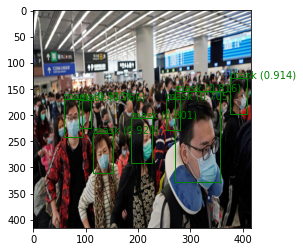

In [ ]:
import PIL
import matplotlib.pyplot as plt

for i in range(x_val.shape[0]):

  img=x_val[i,:,:,:]
  

  plt.figure()
  img,out=show(img,numofgrids,val=False)
  out=nms(out,iou_threshold=0.5)

  # plt.imshow(displayimage(out,img))
  draw_boxes(out,img)

#To run on WebCam Images

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  imgweb = cv2.imdecode(jpg_as_np, flags=1)

  return imgweb

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import Javascript
import IPython
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  IPython.display.display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  IPython.display.display(IPython.display.Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 160 y 96
final x,y: 163 , 107
width 36.0266227722168
height 66.40503692626953
[0.6444249  0.35101932]
class  0
object
x 224 y 96
final x,y: 235 , 110
width 36.71828079223633
height 73.25191497802734
[0.23786224 0.75086033]
class  1
object
x 128 y 160
final x,y: 133 , 177
width 36.19304656982422
height 64.94816589355469
[0.05108168 0.94671917]
class  1
object
x 128 y 224
final x,y: 133 , 246
width 38.598777770996094
height 70.662979125976

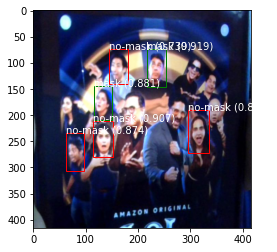

In [ ]:
from PIL import Image
img=Image.open('photo.jpg')
img=img.resize((targetsize,targetsize))
img=np.array(img)
test=img
img,out=show(test,numofgrids,val=False)
out=nms(out)
print(out)

# plt.imshow(displayimage(out,img))
draw_boxes(out,img)



 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
object
x 192 y 256
final x,y: 197 , 259
width 94.36957550048828
height 157.84425354003906
[0.22916147 0.77103215]
class  1
object
x 352 y 320
final x,y: 369 , 332
width 98.74629974365234
height 174.52926635742188
[0.01236216 0.9872062 ]
class  1
[{'prob': 0.6132952, 'x': 197, 'y': 259, 'w': 94, 'h': 157, 'class': 'mask'}, {'prob': 0.9472228, 'x': 369, 'y': 332, 'w': 98, 'h': 174, 'class': 'mask'}]


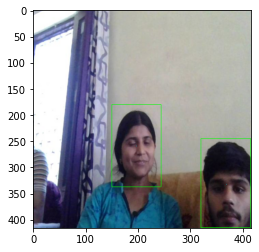

In [ ]:
# from PIL import Image
# img1=Image.open('photo.jpg')
# img1=img1.resize((targetsize,targetsize))
# img1=np.array(img1)
# test=img1
# plt.figure()
# test,out=show(test,numofgrids,val=False)
# finalout=nms(out,iou_threshold=0.5)
# # print(img1.shape)
# print(finalout)
 
# test=displayimage(finalout,test)

# plt.imshow(img1)

# THE END 
extra work from here


no.48
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
predict
[[4.15838528e-08 2.64464319e-07 5.79785478e-07 3.02404874e-06
  1.21931066e-06 7.32832905e-10 7.05542007e-08 1.70687446e-08
  1.75915841e-06]
 [6.52408829e-08 1.12790119e-07 1.07645705e-04 2.53362505e-05
  9.18423575e-06 2.34225172e-06 2.85036367e-05 5.25046198e-06
  6.49938485e-08]
 [1.68455790e-05 9.49129026e-06 1.59857720e-02 3.40656625e-05
  1.72528427e-03 3.42382380e-04 4.94762171e-05 4.86319323e-06
  1.42467336e-08]
 [5.24294376e-03 1.54588732e-03 5.48400351e-07 2.92659261e-05
  1.97860021e-02 1.88736095e-07 1.60820535e-04 2.03261479e-07
  1.62670333e-02]
 [7.93528397e-06 9.59587807e-04 9.99377549e-01 9.23536427e-04
  4.91960160e-02 6.41520368e-04 9.99936461e-01 2.67957337e-03
  4.64836950e-04]
 [6.4

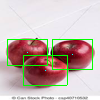

In [ ]:
c=int(input('no.'))
img=x_train[c,:,:,:]
test=img
Image.fromarray(test)

print(y_train[c,:,:,0])
print('predict')
  
test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
test.shape
pred=model.predict(test)
pred[0,:,:,0:3]=sigmoid(pred[0,:,:,0:3])
print(pred[0,:,:,0])
print(((pred[0,:,:,0]>0.7)*1).reshape([numofgrids,numofgrids]))

pred[...,0]=(pred[0,:,:,0]>0.7)*1
#pred[...,1:3]=sigmoid(pred[...,1:3])
pred[...,5:]=K.softmax(pred[...,5:])
test=img
for i in range(numofgrids):
  for j in range(numofgrids):
    if(pred[0,i,j,0]==1):
      print("object")
      x=j*int(targetsize/numofgrids)
      y=i*int(targetsize/numofgrids)
      print('x',x,'y',y)
      xincell=pred[0,i,j,1]*int(targetsize/numofgrids)
      yincell=pred[0,i,j,2]*int(targetsize/numofgrids)
      print('final x,y:',int(x+xincell),",",int(y+yincell))
      uppercornerx=int(x+xincell)-int(pred[0,i,j,3]*int(targetsize/numofgrids)/2)
      uppercornery=int(y+yincell)-int(pred[0,i,j,4]*int(targetsize/numofgrids)/2)
     
      lowercornerx=int(x+xincell)+int(pred[0,i,j,3]*int(targetsize/numofgrids)/2)
      lowercornery=int(y+yincell)+int(pred[0,i,j,4]*int(targetsize/numofgrids)/2)

      print('width',pred[0,i,j,3]*int(targetsize/numofgrids))
      print('height',pred[0,i,j,4]*int(targetsize/numofgrids))
      print(pred[0,i,j,5:])
      print("class ",np.argmax(pred[0,i,j,5:]))
      if (np.argmax(pred[0,i,j,5:])==1):
        rgb=[255,0,0]
      else:
        rgb=[0,255,0]
      test[K.clip(uppercornery,min_value=0,max_value=targetsize-1):K.clip(uppercornery+int(pred[0,i,j,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1),:]=rgb
      test[K.clip(lowercornery-int(pred[0,i,j,4]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1):K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(lowercornerx,min_value=0,max_value=targetsize-1),:]=rgb

      test[K.clip(uppercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb
      test[K.clip(lowercornery,min_value=0,max_value=targetsize-1),K.clip(uppercornerx,min_value=0,max_value=targetsize-1):K.clip(uppercornerx+int(pred[0,i,j,3]*int(targetsize/numofgrids)),min_value=0,max_value=targetsize-1),:]=rgb

      

      test[K.clip(int(y+yincell),min_value=0,max_value=targetsize-1),K.clip(int(x+xincell),min_value=0,max_value=targetsize-1),:]=[0,255,255] #center
        # test[uppercornery,uppercornerx,:]=[0,0,255]
        # test[lowercornery,lowercornerx,:]=[0,0,255]
Image.fromarray(test)

In [ ]:
pred[...,3:5]

In [ ]:
# pred[0,:,:,:]

In [ ]:
x_input=layers.Input(shape=(100,100,3))
x=layers.Conv2D(32,(3,3),activation='relu')(x_input)
x=layers.MaxPooling2D((2,2))(x)
#x=layers.Dropout(0.8)(x)

x=layers.Conv2D(64,(3,3),activation='relu')(x)
x=layers.MaxPooling2D((2,2))(x)
#x=layers.Dropout(0.8)(x)

x=layers.Conv2D(64,(3,3),activation='relu')(x)
x=layers.MaxPooling2D((2,2))(x)

x=layers.Flatten()(x)
x=layers.Dropout(0.8)(x)
x=layers.Dense(25*3,activation='linear')(x)
output=layers.Reshape((5,5,3))(x)

modelpc=Model(inputs=x_input,outputs=output)
modelpc.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 64)        0   

In [ ]:
def pc_loss2(y_true,y_pred):
  obj=y_true[...,0]==1            #index of cells which have objects
  noobj=y_true[...,0]==0
  print("true",y_true.shape,'pred',y_pred.shape)
  obj_loss=K.binary_crossentropy(y_true[...,0][obj], y_pred[...,0][obj],from_logits=True)

  noobj_loss=K.binary_crossentropy(y_true[...,0][noobj], y_pred[...,0][noobj],from_logits=True)
  class_loss=K.categorical_crossentropy(y_true[...,1:][obj],y_pred[...,1:][obj],from_logits=True)
  #class_loss=K.mean(K.square(y_true[...,1:][obj] - y_pred[...,1:][obj]), axis=-1)
  #class_loss=K.binary_crossentropy(y_true[...,1:], y_pred[...,1:],from_logits=True)
  noobjval=1
  objval=1
  classval=0
  #return ((classval*class_loss)+(objval*obj_loss))
  obj_loss_single=tf.reduce_mean(obj_loss)
  noobj_loss_single=tf.reduce_mean(noobj_loss)
  class_loss_single=tf.reduce_mean(class_loss)
  tf.print('objloss',obj_loss_single)
  tf.print('noobjloss',noobj_loss_single)
  return ((objval*obj_loss_single)+(noobjval*noobj_loss_single)+(classval*class_loss_single))

In [ ]:
def loss_function(y_true, y_pred):
  obj=y_true==1            #index of cells which have objects
  noobj=y_true==0          #index of cells which does not have objects
  #print(y_true)
  # objarr=(obj)*1
  # noobjarr=np.array(noobj)*1
  # obj_mask=K.variable(objarr)
  # noobj_mask=K.variable(noobjarr)
  obj_mask=tf.cast(obj,dtype='float32')
  noobj_mask=tf.cast(noobj,dtype='float32')
  #print(obj_mask)
  #print(noobj_mask)
  #print("obj",obj,'noobj',noobj)
  #bj_loss=K.binary_crossentropy(y_true[obj], y_pred[obj],from_logits=True)
  obj_loss=K.binary_crossentropy(y_true*obj_mask, y_pred*obj_mask,from_logits=True)

  #noobj_loss=K.binary_crossentropy(y_true[noobj], y_pred[noobj],from_logits=True)
  noobj_loss=K.binary_crossentropy(y_true*noobj_mask, y_pred*noobj_mask,from_logits=True)
  #print(y_true[noobj])
  return obj_loss

In [ ]:
from keras import backend as K
def anne(y_true,y_pred):
  return K.binary_crossentropy(y_true[...,0], y_pred[...,0],from_logits=True)

In [ ]:
y_train[0:2,:,:,0,None].shape

(2, 5, 5, 1)

In [ ]:
loss_function(K.variable(y_train[0:2,:,:,0].reshape([-1,25])),K.variable(y_train[2:4,:,:,0].reshape([-1,25])))

<tf.Tensor: shape=(2, 25), dtype=float32, numpy=
array([[0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472],
       [0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.3132617, 0.3132617, 0.6931472, 0.6931472, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.3132617, 0.6931472,
        0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472, 0.6931472,
        0.6931472]], dtype=float32)>

In [ ]:
np.concatenate([y_train[0:2,:,:,0:1],y_train[0:2,:,:,5:]],axis=-1).shape
np.concatenate([y_train[2:4,:,:,0:1],y_train[2:4,:,:,5:]],axis=-1).shape

(2, 5, 5, 3)

In [ ]:
pc_loss2(K.variable(np.concatenate([y_train[0:2,:,:,0:1],y_train[0:2,:,:,5:]],axis=-1)),K.variable(np.concatenate([y_train[2:4,:,:,0:1],y_train[2:4,:,:,5:]],axis=-1)))

true (2, 5, 5, 3) pred (2, 5, 5, 3)
objloss 0.566518724
noobjloss 0.768770933


<tf.Tensor: shape=(), dtype=float32, numpy=1.3352897>

In [ ]:
#modelpc.compile(loss=anne,optimizer='adam')
modelpc.compile(loss=pc_loss2,optimizer='adam')

In [ ]:
#y_train[:,:,:,0].reshape([-1,25]).shape
np.concatenate([y_train[:,:,:,0:1],y_train[:,:,:,5:]],axis=-1).shape

(563, 5, 5, 3)

In [ ]:
modelpc.fit(x=x_train,y=np.concatenate([y_train[:,:,:,0:1],y_train[:,:,:,5:]],axis=-1),validation_data=(x_val,np.concatenate([y_val[:,:,:,0:1],y_val[:,:,:,5:]],axis=-1)),batch_size=64,epochs=100)

Epoch 1/100
true (None, 5, 5, 3) pred (None, 5, 5, 3)
true (None, 5, 5, 3) pred (None, 5, 5, 3)
objloss 36.1534081
noobjloss 36.9693718
1/9 [==>...........................] - ETA: 18s - loss: 73.1228objloss 22.8330498
noobjloss 14.1670542
2/9 [=====>........................] - ETA: 6s - loss: 64.0921 objloss 13.4083643
noobjloss 6.66248226
3/9 [=========>....................] - ETA: 5s - loss: 57.1940objloss 7.78561592
noobjloss 4.10832167
4/9 [============>.................] - ETA: 4s - loss: 51.7760objloss 4.01395416
noobjloss 2.23786688
5/9 [===============>..............] - ETA: 3s - loss: 47.3544objloss 2.17022943
noobjloss 1.51055944
6/9 [===================>..........] - ETA: 2s - loss: 43.6848objloss 1.62572122
noobjloss 1.09376025
7/9 [======================>.......] - ETA: 1s - loss: 40.6020objloss 1.14223564
noobjloss 0.855054319
8/9 [=========================>....] - ETA: 0s - loss: 37.9758objloss 0.866704047
noobjloss 0.726500392
9/9 [==============================] - ETA:

KeyboardInterrupt: ignored

no.9


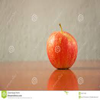

In [ ]:
c=int(input('no.'))
test=x_val[c,:,:,:]
Image.fromarray(test)

In [ ]:
print(y_val[c,:,:,0])
print('predicted')
test=test.reshape([1,test.shape[0],test.shape[1],test.shape[2]])
test.shape
pred=modelpc.predict(test)
print(pred.shape)
pred=sigmoid(pred)

print(np.round(pred[0,:,:,0].reshape([5,5]),decimals=5))
print(((pred[0,:,:,0]>0.5)*1).reshape([5,5]))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
predicted
(1, 5, 5, 3)
[[0.46191 0.46806 0.46487 0.47348 0.46302]
 [0.47444 0.51825 0.53377 0.52357 0.48414]
 [0.49717 0.53562 0.54107 0.53766 0.49957]
 [0.47683 0.53072 0.53331 0.53038 0.48025]
 [0.46393 0.4716  0.46802 0.47084 0.46249]]
[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [ ]:
mask=(pred[0,:,:,0]>0.5)
pred[0,:,:,0]=(pred[0,:,:,0]>0.5)*1
(pred[0,:,:,:]>0.5)*1

In [ ]:
np.concatenate([y_val[c,:,:,0:1],y_val[c,:,:,5:]],axis=-1)